In [7]:
import networkx as nx
from pyvis.network import Network
import community
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from latex import latexify
latexify(columns = 2)

%matplotlib inline
%config InlineBackend.figure_format = "retina"

# **Zachary's Karate Club**

In [60]:
G = nx.karate_club_graph()

# nt = Network(height = "1080px", width = "100%", notebook = True, cdn_resources = "remote")

for node in G.nodes:
    G.nodes[node]["label"] = str(node)
    if G.nodes[node]["club"] == "Mr. Hi":
        G.nodes[node]["color"] = "blue"
    else:
        G.nodes[node]["color"] = "red"

# nt.from_nx(G)
# nt.show("karate.html")

print("Number of nodes: ", G.number_of_nodes())
print("Number of edges: ", G.number_of_edges())
print("Average degree: ", np.mean([d for n, d in G.degree()]))
print("Clustering coefficient: ", nx.average_clustering(G))
print("Average shortest path length: ", nx.average_shortest_path_length(G))
print("Modularity: ", community.modularity(community.best_partition(G), G))
print("Number of communities: ", len(set(community.best_partition(G).values())))
print("Community sizes: ", pd.Series(list(community.best_partition(G).values())).value_counts().sort_index().values)

Number of nodes:  34
Number of edges:  78
Average degree:  4.588235294117647
Clustering coefficient:  0.5706384782076823
Average shortest path length:  2.408199643493761
Modularity:  0.4276718952043627
Number of communities:  3
Community sizes:  [11  6  5 12]


In [63]:
dit = nx.edge_betweenness_centrality(G)
edges_tuples = sorted(dit.items(), key = lambda x: x[1], reverse = True)
print(edges_tuples[:5])

[((0, 31), 0.1272599949070537), ((0, 6), 0.07813428401663695), ((0, 5), 0.07813428401663694), ((0, 2), 0.0777876807288572), ((0, 8), 0.07423959482783014)]


In [64]:
ccomp = nx.connected_components(G)
print("Number of connected components: ", nx.number_connected_components(G))

Number of connected components:  1


<generator object connected_components at 0x330510c10>

# $$ \text{Girvan-Newman Algorithm} $$
$$ \text{Based upon the edge-betweenness} \to $$
$$ \text{Fraction of the times an edge gets crossed in a shortest path traversal across all node pairs} $$

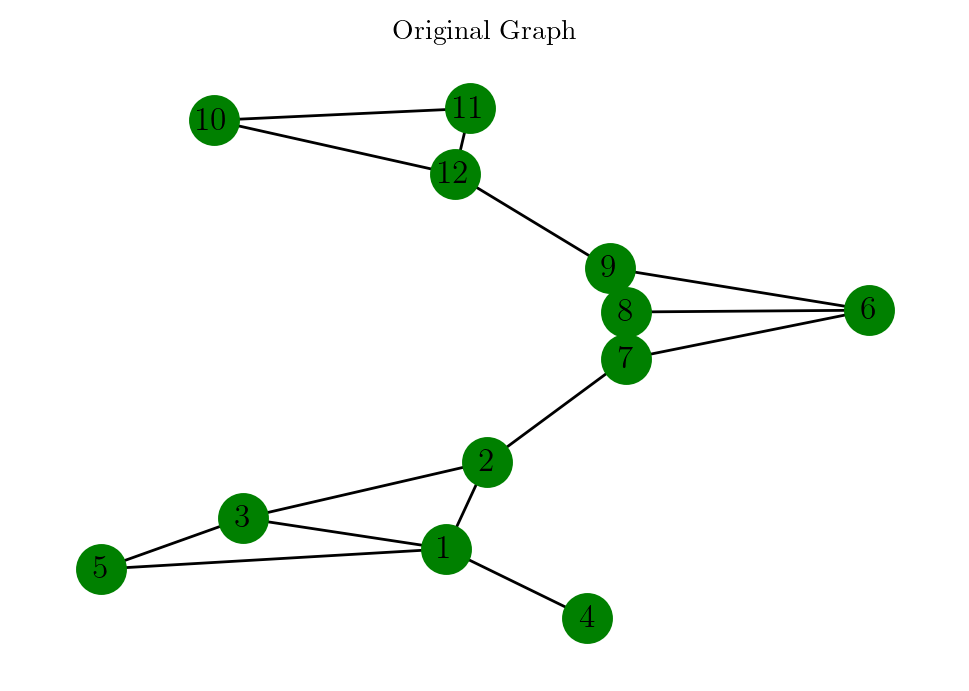

In [105]:
G = nx.Graph()
G.add_edges_from([[1, 2], [2, 3], [1, 3], [1, 4], [1, 5], [3, 5],
                  [6, 7], [7, 8], [8, 9], [6, 9], [6, 8], [7, 9],
                  [10, 11], [11, 12], [10, 12], 
                  [9, 12], [2, 7]])

plt.figure(figsize = (6, 4))
plt.title("Original Graph")
nx.draw(G, with_labels = True, node_color = "green", pos = nx.spring_layout(G, scale = 4), node_size = 300)

In [101]:
def plotEdgeBetweenness(G, title):
    edge_betweenness = list(nx.edge_betweenness_centrality(G).values())
    plt.figure(figsize = (10, 5))
    plt.title(title)
    plt.plot(edge_betweenness, marker = "o")

    for i, txt in enumerate(edge_betweenness):
        plt.annotate(f"{txt:.5f}", (i, edge_betweenness[i]))

    plt.xticks(range(len(edge_betweenness)), [f"({e[0]}, {e[1]})" for e in G.edges()], rotation = 90)
    plt.xlabel("Edges")
    plt.ylabel("Edge Betweenness")
    plt.show()

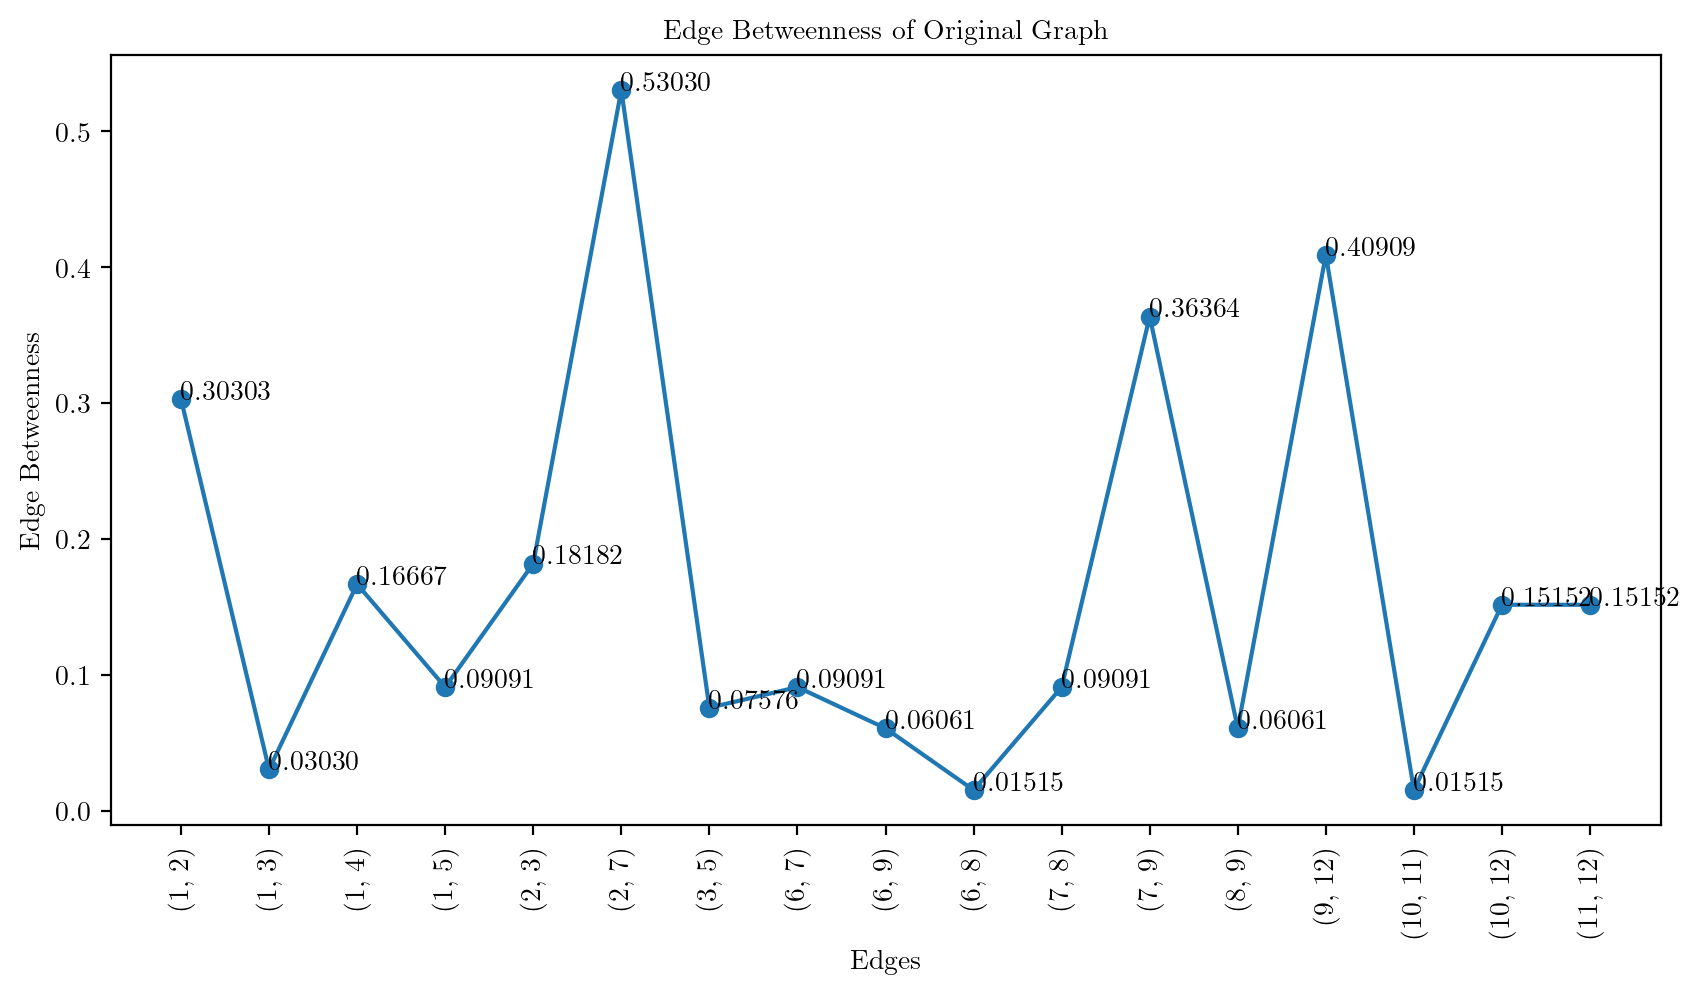

In [102]:
plotEdgeBetweenness(G, "Edge Betweenness of Original Graph")

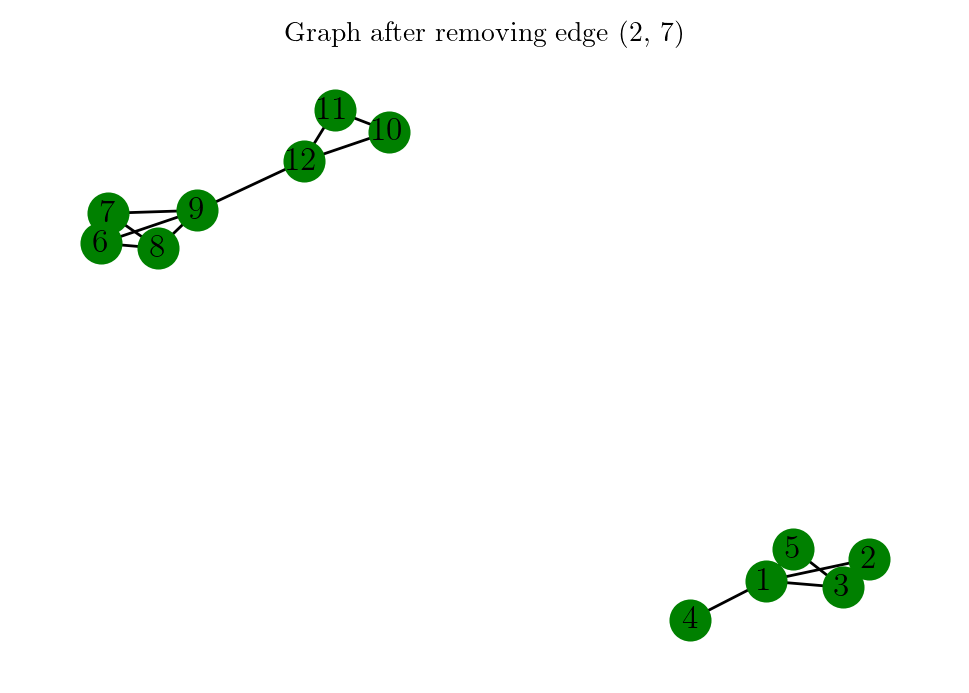

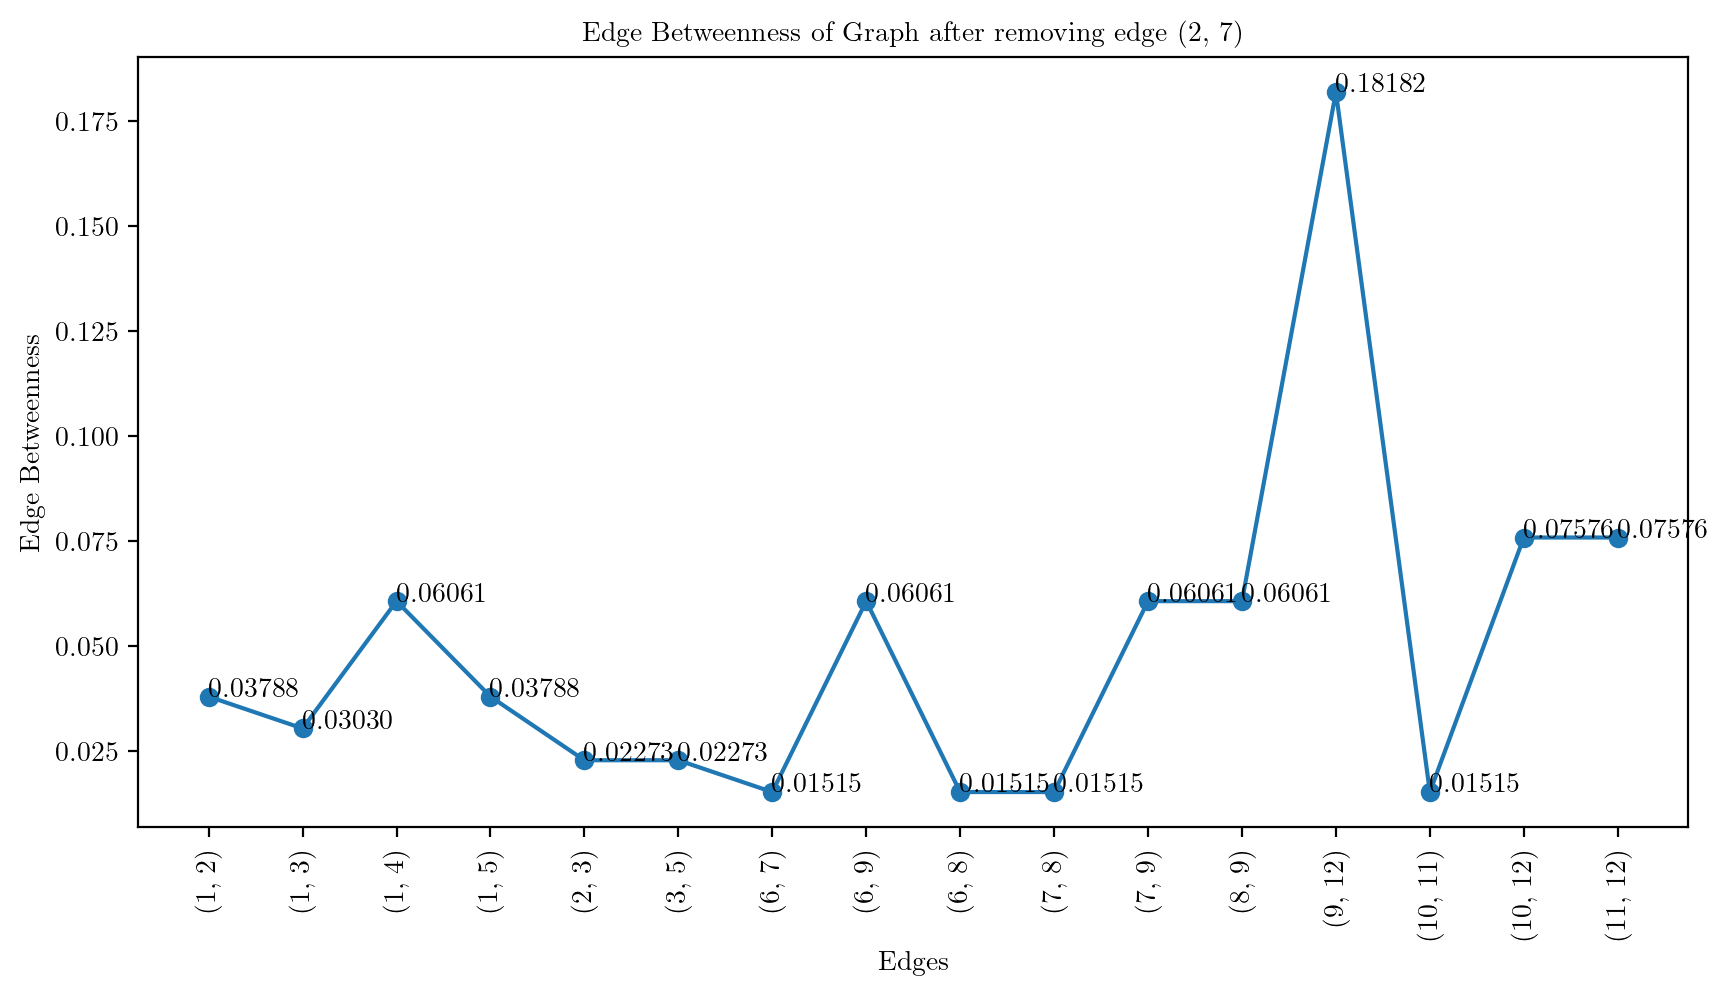

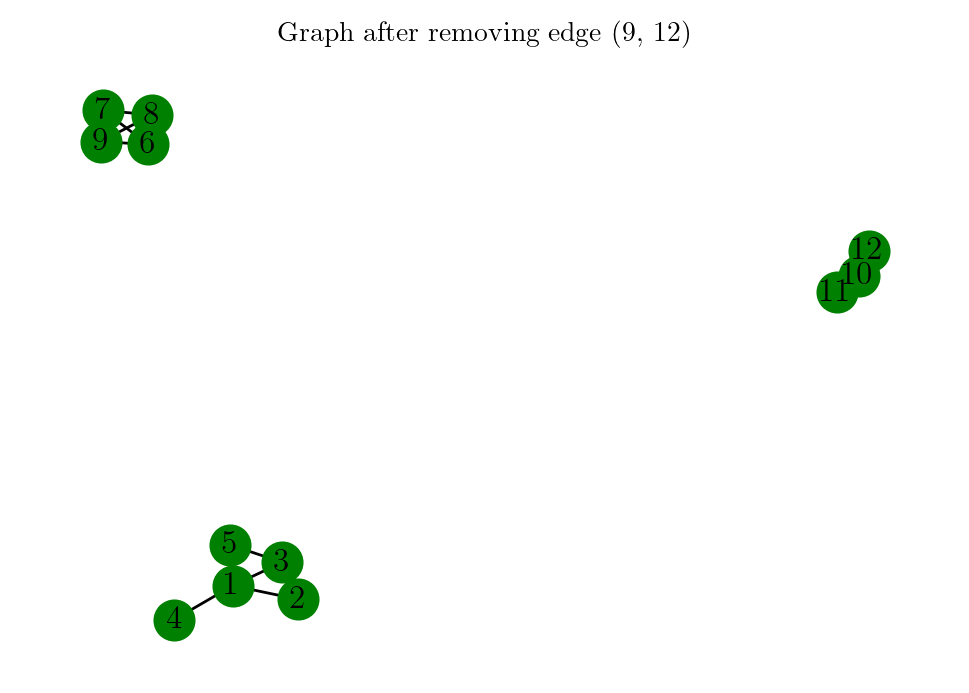

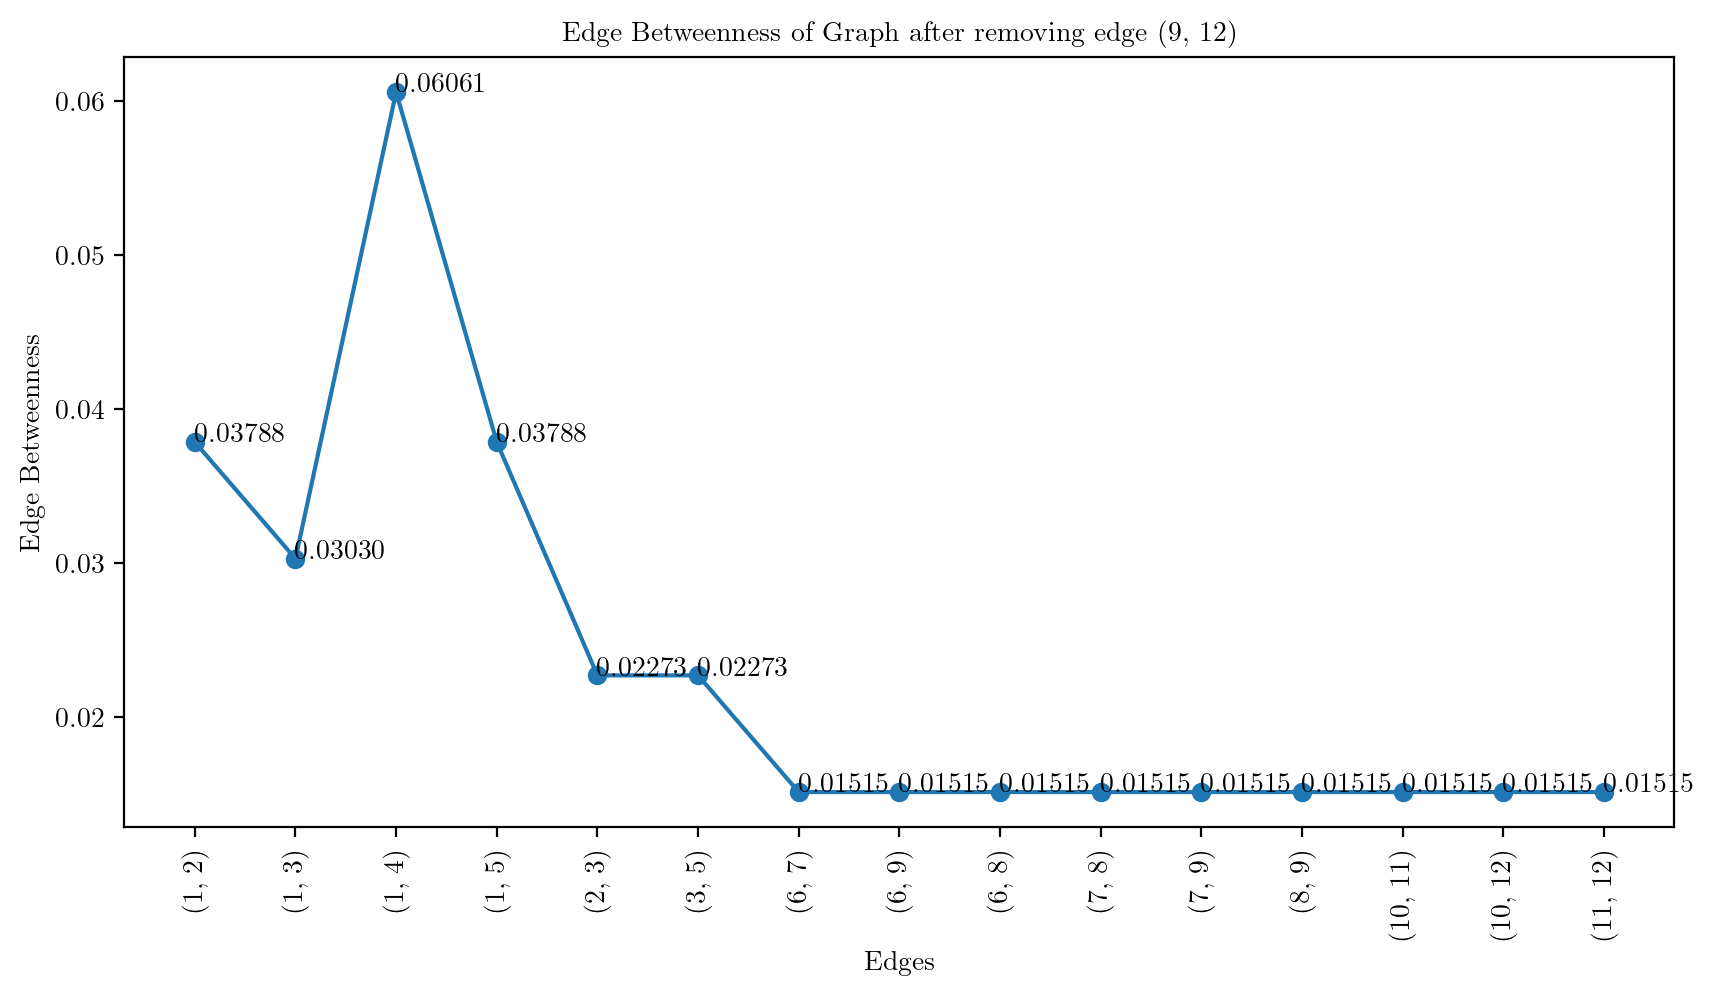

In [106]:
for i in range(2):
    edge_betweenness = nx.edge_betweenness_centrality(G)
    edge_to_remove = max(edge_betweenness, key = edge_betweenness.get)
    G.remove_edge(*edge_to_remove)
    plt.figure(figsize = (6, 4))
    plt.title(f"Graph after removing edge {edge_to_remove}")
    nx.draw(G, with_labels = True, node_color = "green", node_size = 200, pos = nx.spring_layout(G, scale = 4))
    plt.show()
    plotEdgeBetweenness(G, f"Edge Betweenness of Graph after removing edge {edge_to_remove}")

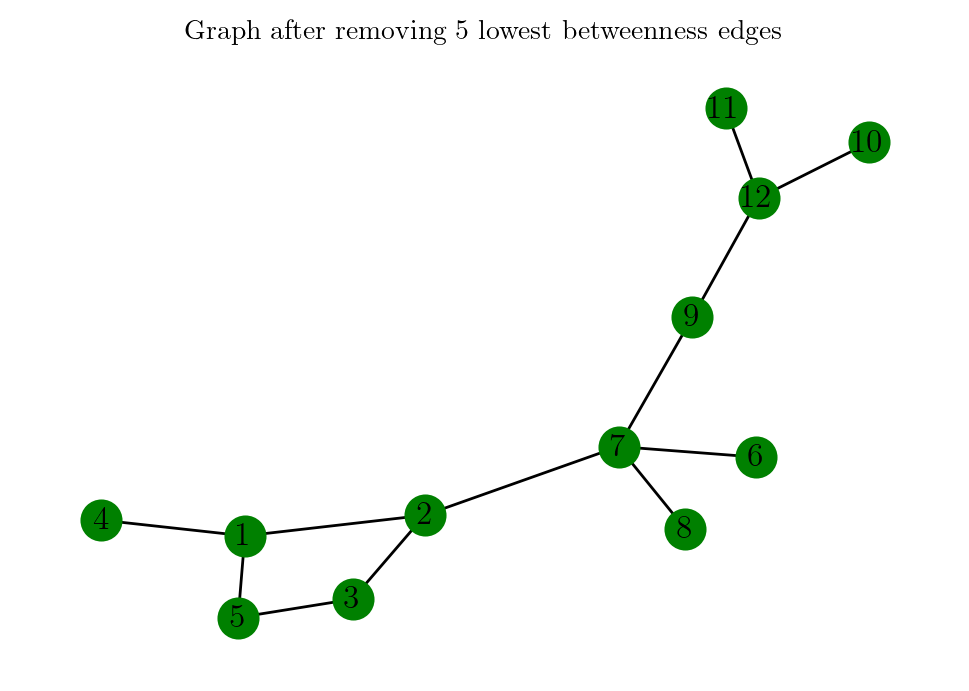

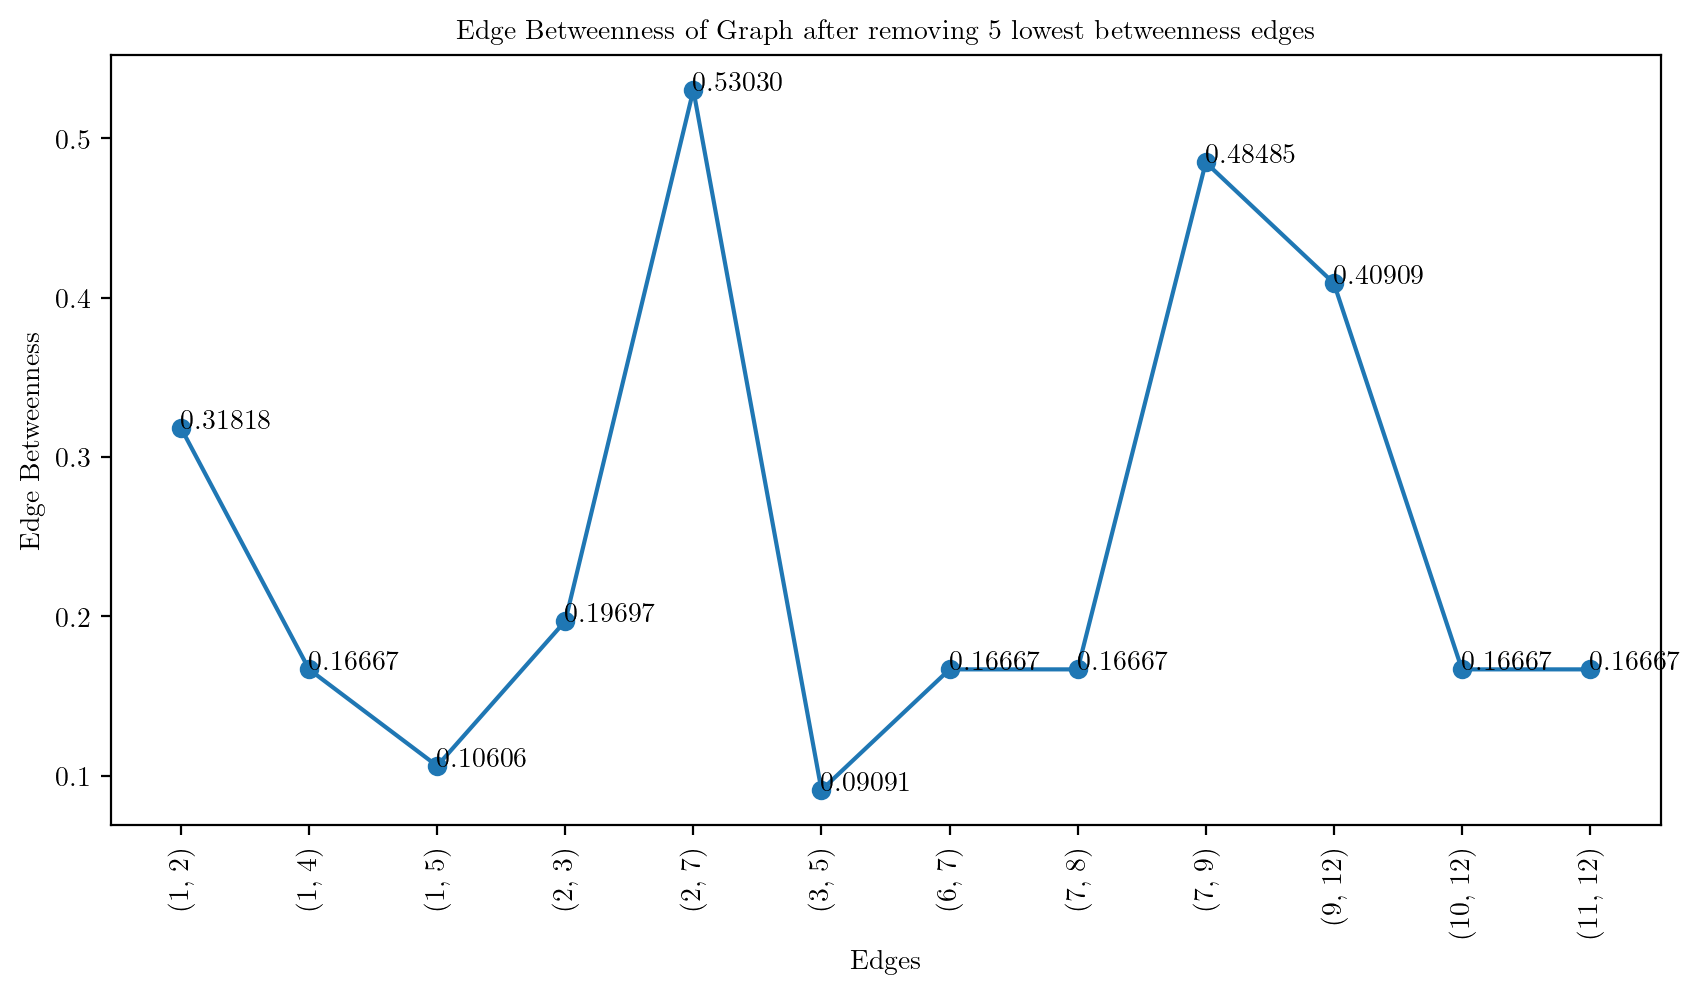

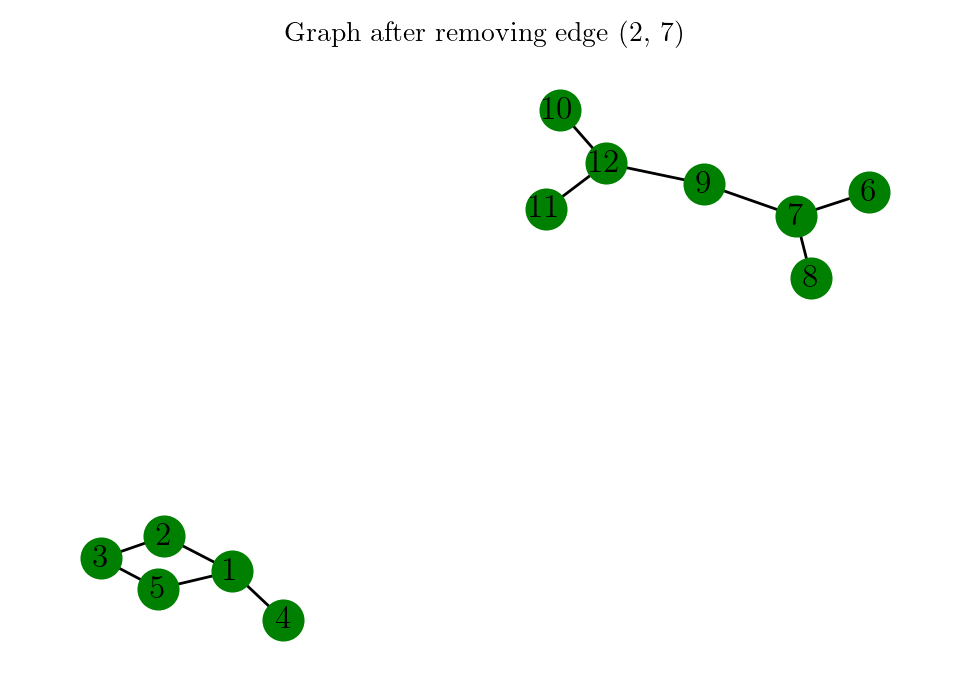

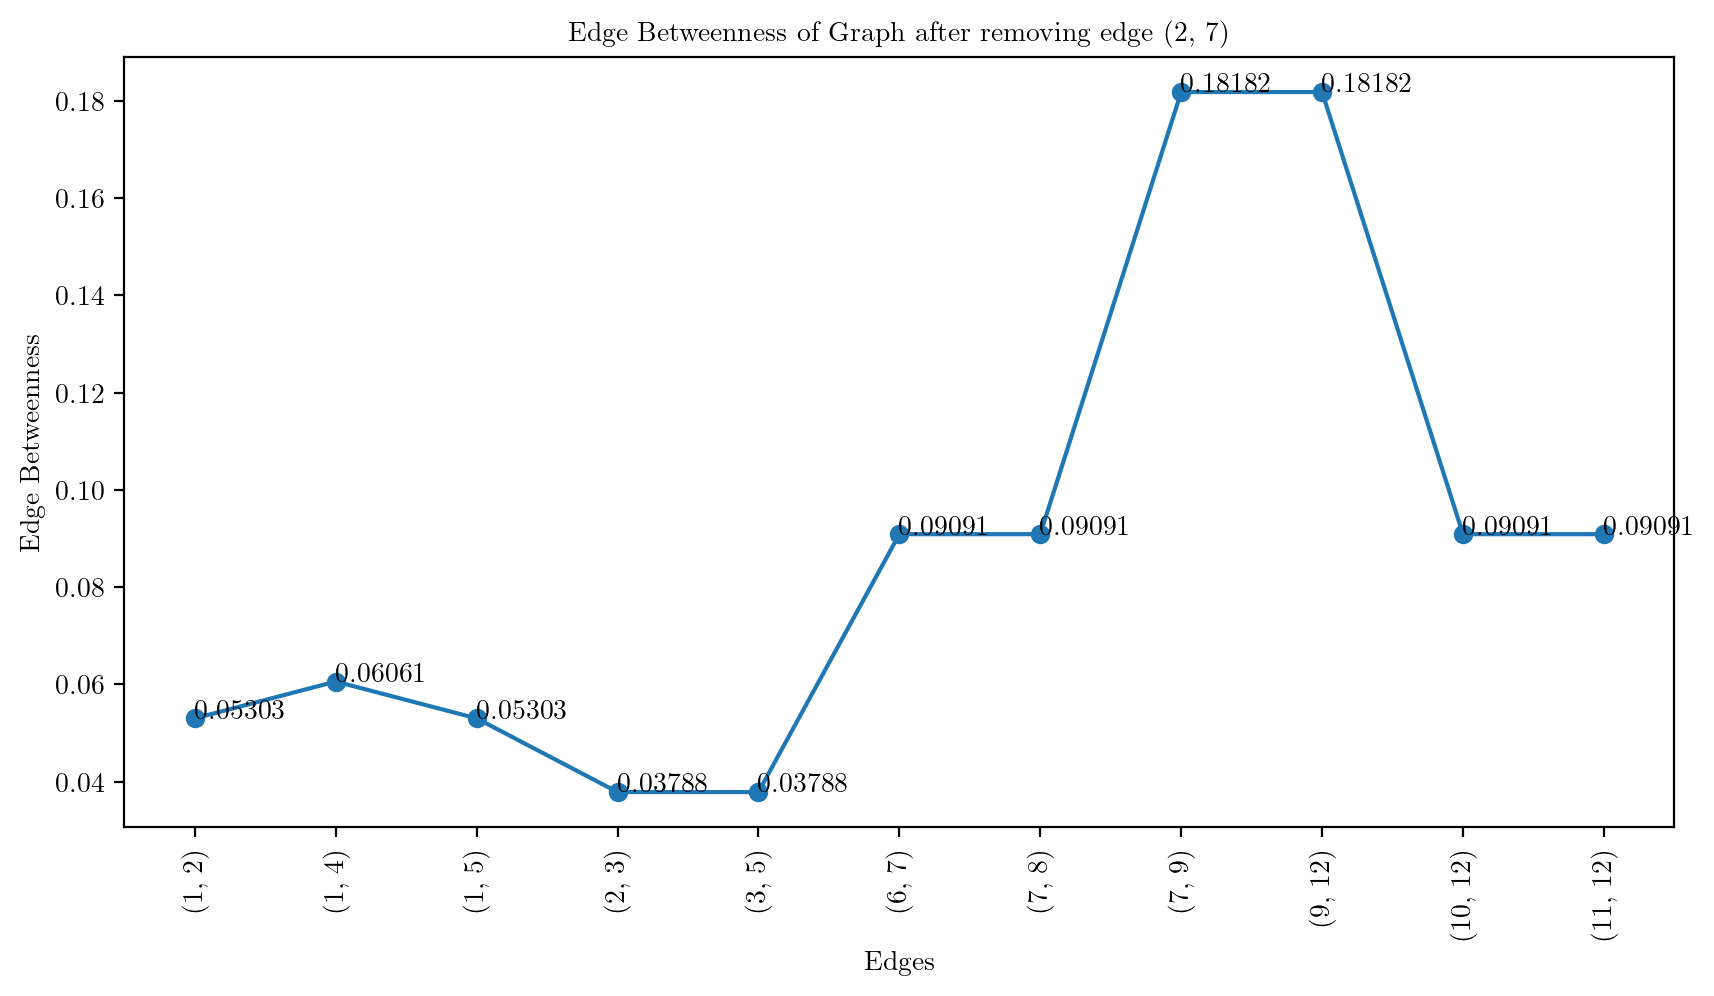

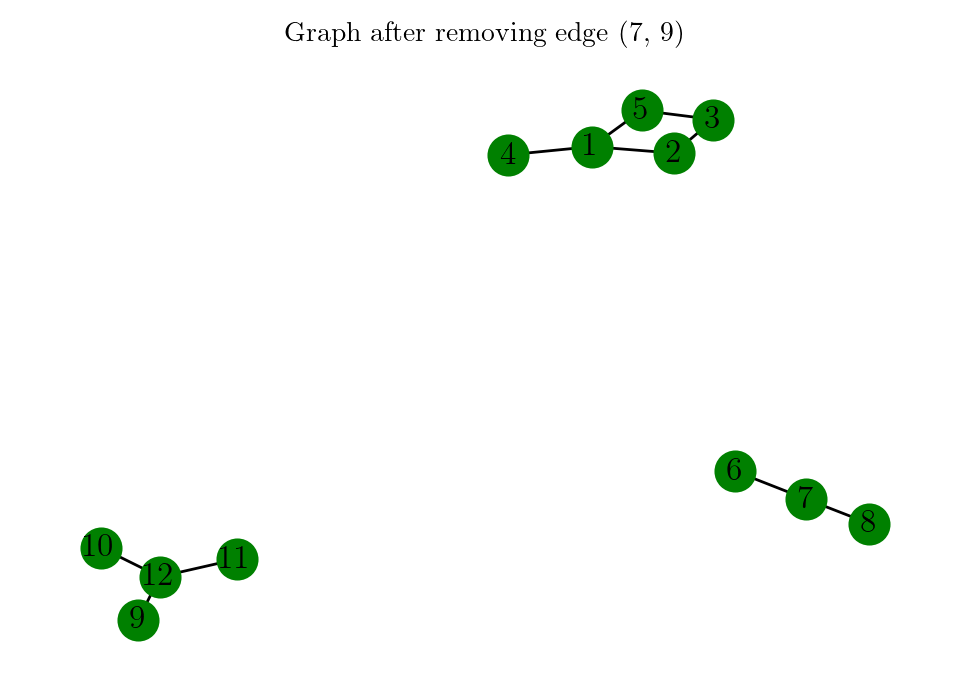

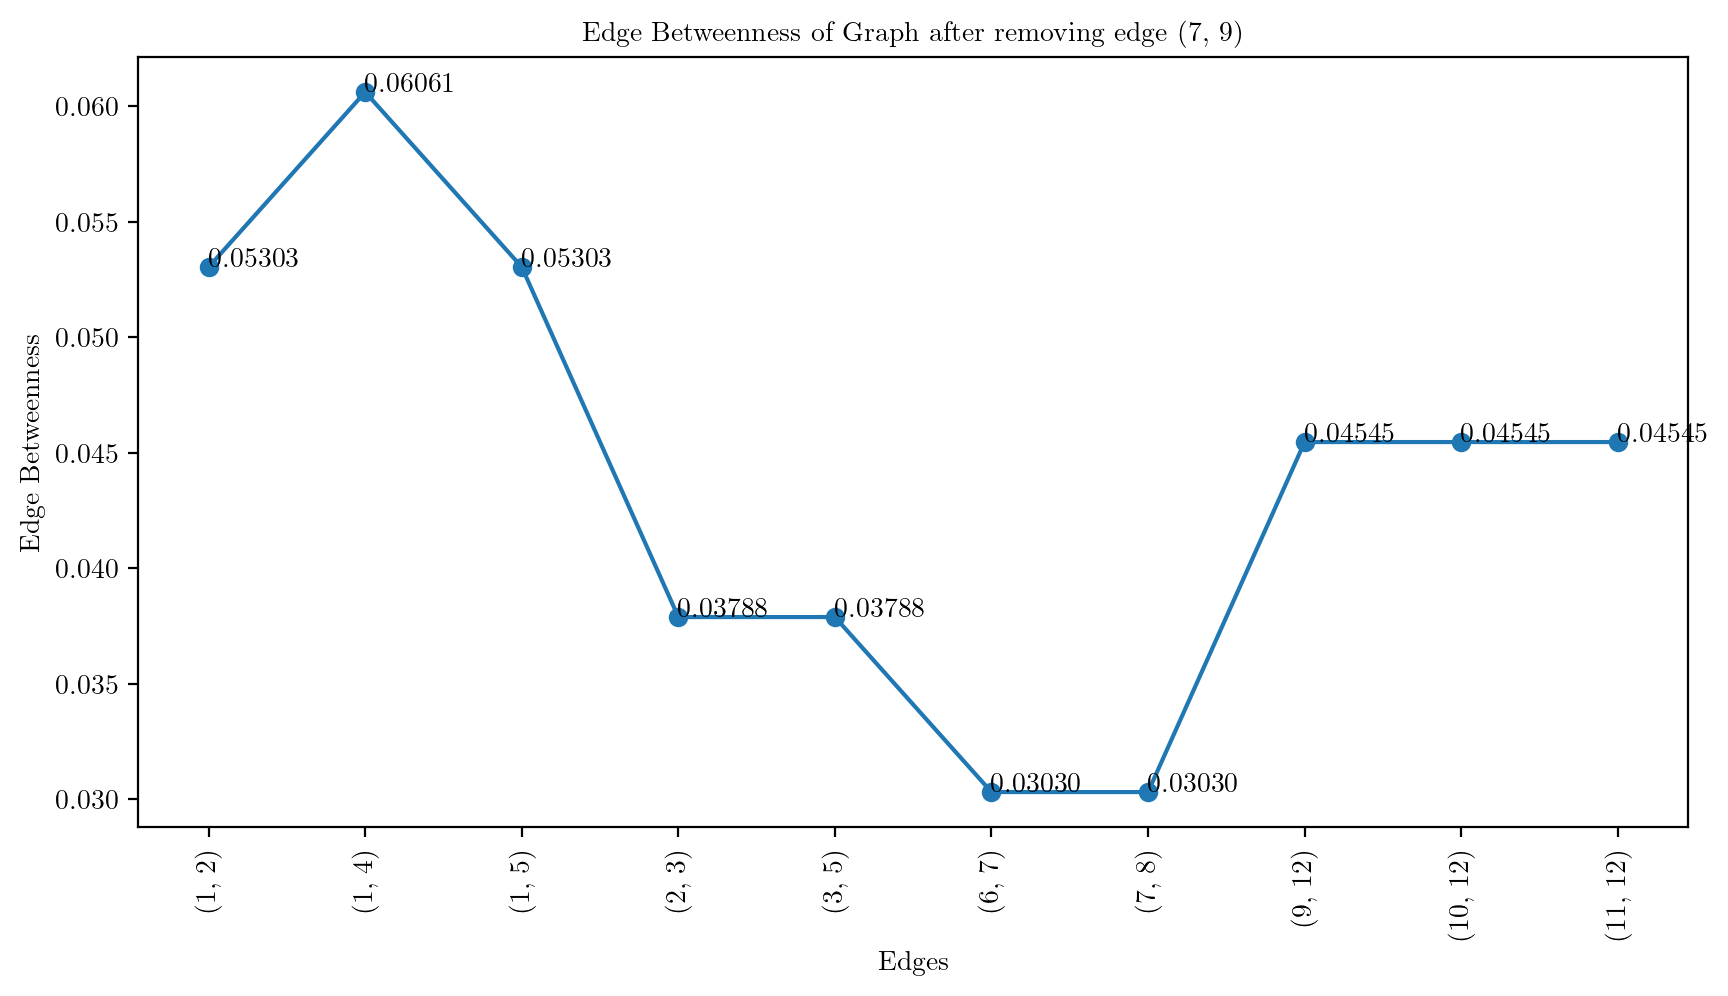

In [107]:
G = nx.Graph()
G.add_edges_from([[1, 2], [2, 3], [1, 3], [1, 4], [1, 5], [3, 5],
                  [6, 7], [7, 8], [8, 9], [6, 9], [6, 8], [7, 9],
                  [10, 11], [11, 12], [10, 12], 
                  [9, 12], [2, 7]])

edge_betweenness = nx.edge_betweenness_centrality(G)
edges_to_remove = sorted(edge_betweenness, key = edge_betweenness.get)[:5]
G.remove_edges_from(edges_to_remove)

plt.figure(figsize = (6, 4))
plt.title("Graph after removing 5 lowest betweenness edges")
nx.draw(G, with_labels = True, node_color = "green", node_size = 200, pos = nx.spring_layout(G, scale = 4))
plt.show()

plotEdgeBetweenness(G, "Edge Betweenness of Graph after removing 5 lowest betweenness edges")

for i in range(2):
    edge_betweenness = nx.edge_betweenness_centrality(G)
    edge_to_remove = max(edge_betweenness, key = edge_betweenness.get)
    G.remove_edge(*edge_to_remove)
    plt.figure(figsize = (6, 4))
    plt.title(f"Graph after removing edge {edge_to_remove}")
    nx.draw(G, with_labels = True, node_color = "green", node_size = 200, pos = nx.spring_layout(G, scale = 4))
    plt.show()
    plotEdgeBetweenness(G, f"Edge Betweenness of Graph after removing edge {edge_to_remove}")

## **Functions for Extracting Graph and Communities**

In [9]:
def loadGraph(path):
    G = nx.Graph()
    with open(path) as f:
        for line in f:
            if line.startswith("#"):
                continue
            u, v = map(int, line.strip().split("\t"))
            G.add_edge(u, v)
    return G

def loadCommunity(path, k = None):
    community = {}
    node = set()
    with open(path) as f:
        for id, nodes in enumerate(f):
            if (k is not None) and (id >= k):
                break
            community[id] = list(map(int, nodes.strip().split("\t"))) 
            node.update(set(community[id]))
    return community, node

def inducedSubgraph(G, nodes):
    H = G.subgraph(nodes)
    return H
    

# **DBLP**

In [10]:
G_DBLP = loadGraph("./Networks/DBLP/com-dblp.ungraph.txt")
communities, nodes = loadCommunity("./Networks/DBLP/com-dblp.top5000.cmty.txt", k = 150)
G_ind_DBLP = inducedSubgraph(G_DBLP, nodes)

print("Number of nodes: ", G_DBLP.number_of_nodes())
print("Number of edges: ", G_DBLP.number_of_edges())
print("Number of communities: ", len(communities))
print("Number of nodes in induced subgraph: ", G_ind_DBLP.number_of_nodes())
print("Number of edges in induced subgraph: ", G_ind_DBLP.number_of_edges())

Number of nodes:  317080
Number of edges:  1049866
Number of communities:  150
Number of nodes in induced subgraph:  1420
Number of edges in induced subgraph:  4609


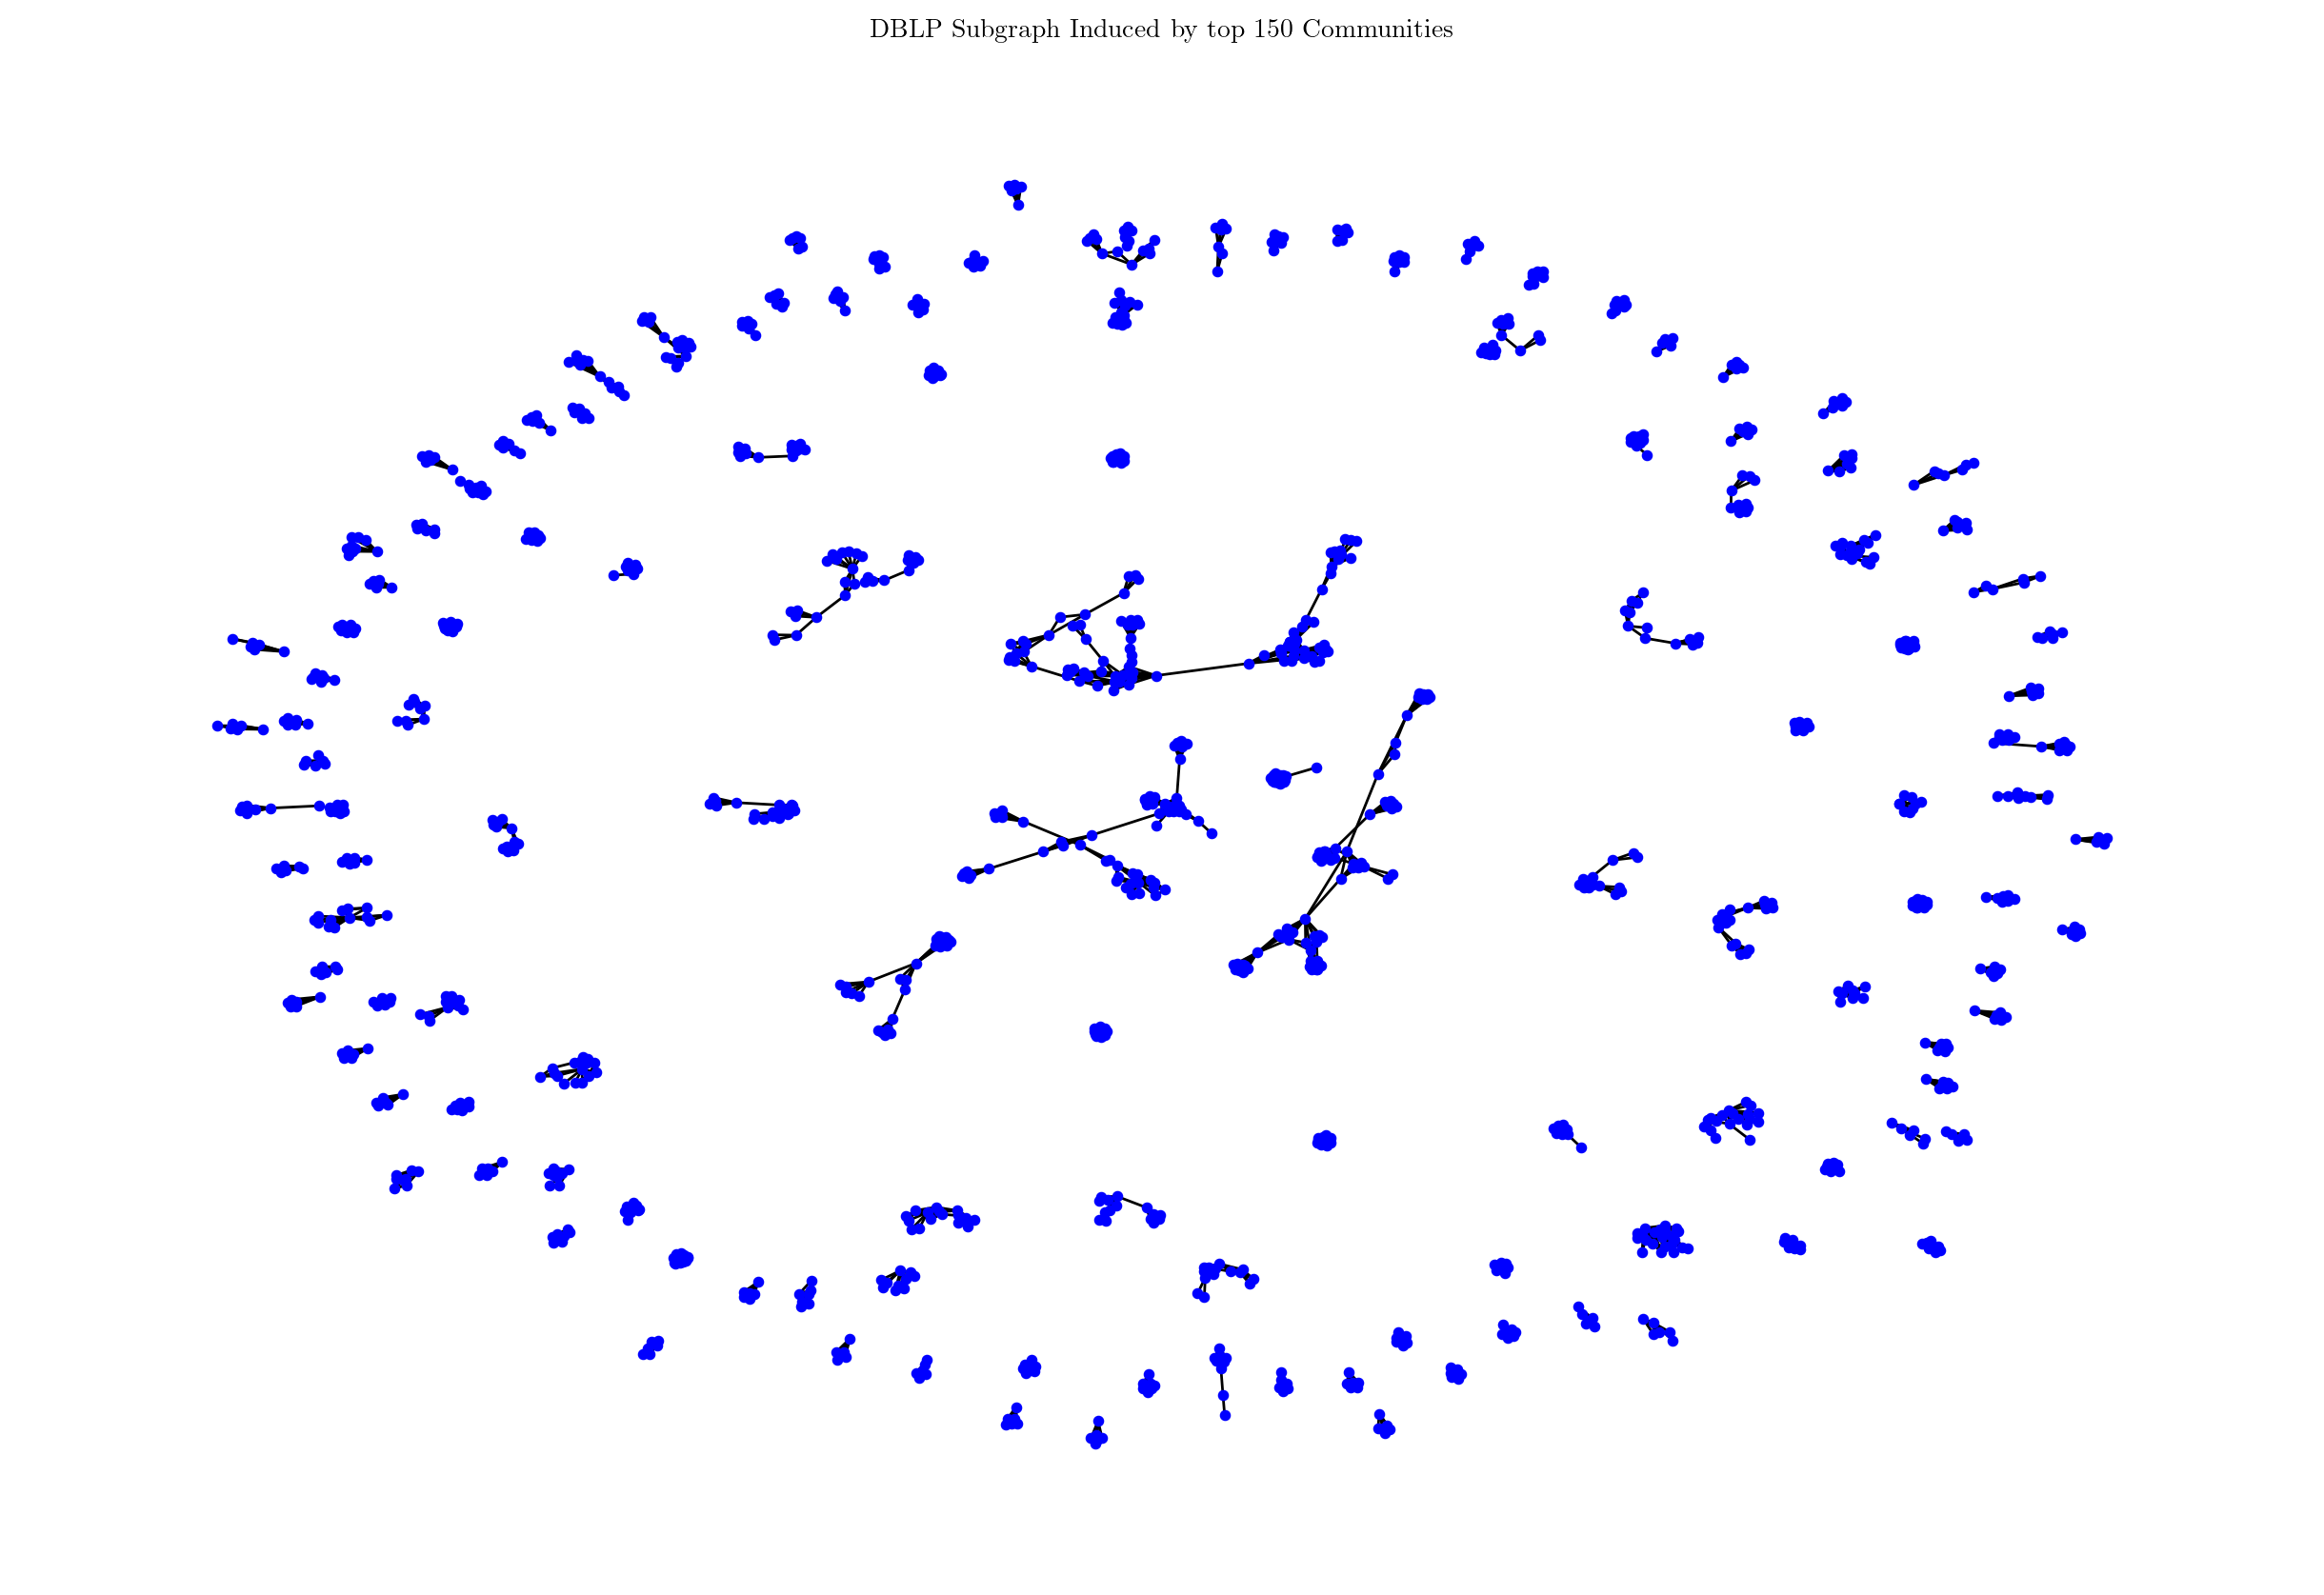

In [116]:
plt.figure(figsize = (12, 8))
nx.draw(G_ind_DBLP, with_labels = False, node_size = 10, node_color = "blue", edge_color = "black", pos = nx.spring_layout(G_ind_DBLP, scale = 4))
plt.title("DBLP Subgraph Induced by top 150 Communities")
plt.show()

# **Amazon Co-Purchase**

In [11]:
G_Amz = loadGraph("./Networks/AmazonCoPurchase/com-amazon.ungraph.txt")
communities, nodes = loadCommunity("./Networks/AmazonCoPurchase/com-amazon.top5000.cmty.txt", k = 300)
G_ind_Amz = inducedSubgraph(G_Amz, nodes)

print("Number of nodes: ", G_Amz.number_of_nodes())
print("Number of edges: ", G_Amz.number_of_edges())
print("Number of communities: ", len(communities))
print("Number of nodes in induced subgraph: ", G_ind_Amz.number_of_nodes())
print("Number of edges in induced subgraph: ", G_ind_Amz.number_of_edges())

Number of nodes:  334863
Number of edges:  925872
Number of communities:  300
Number of nodes in induced subgraph:  2008
Number of edges in induced subgraph:  5960


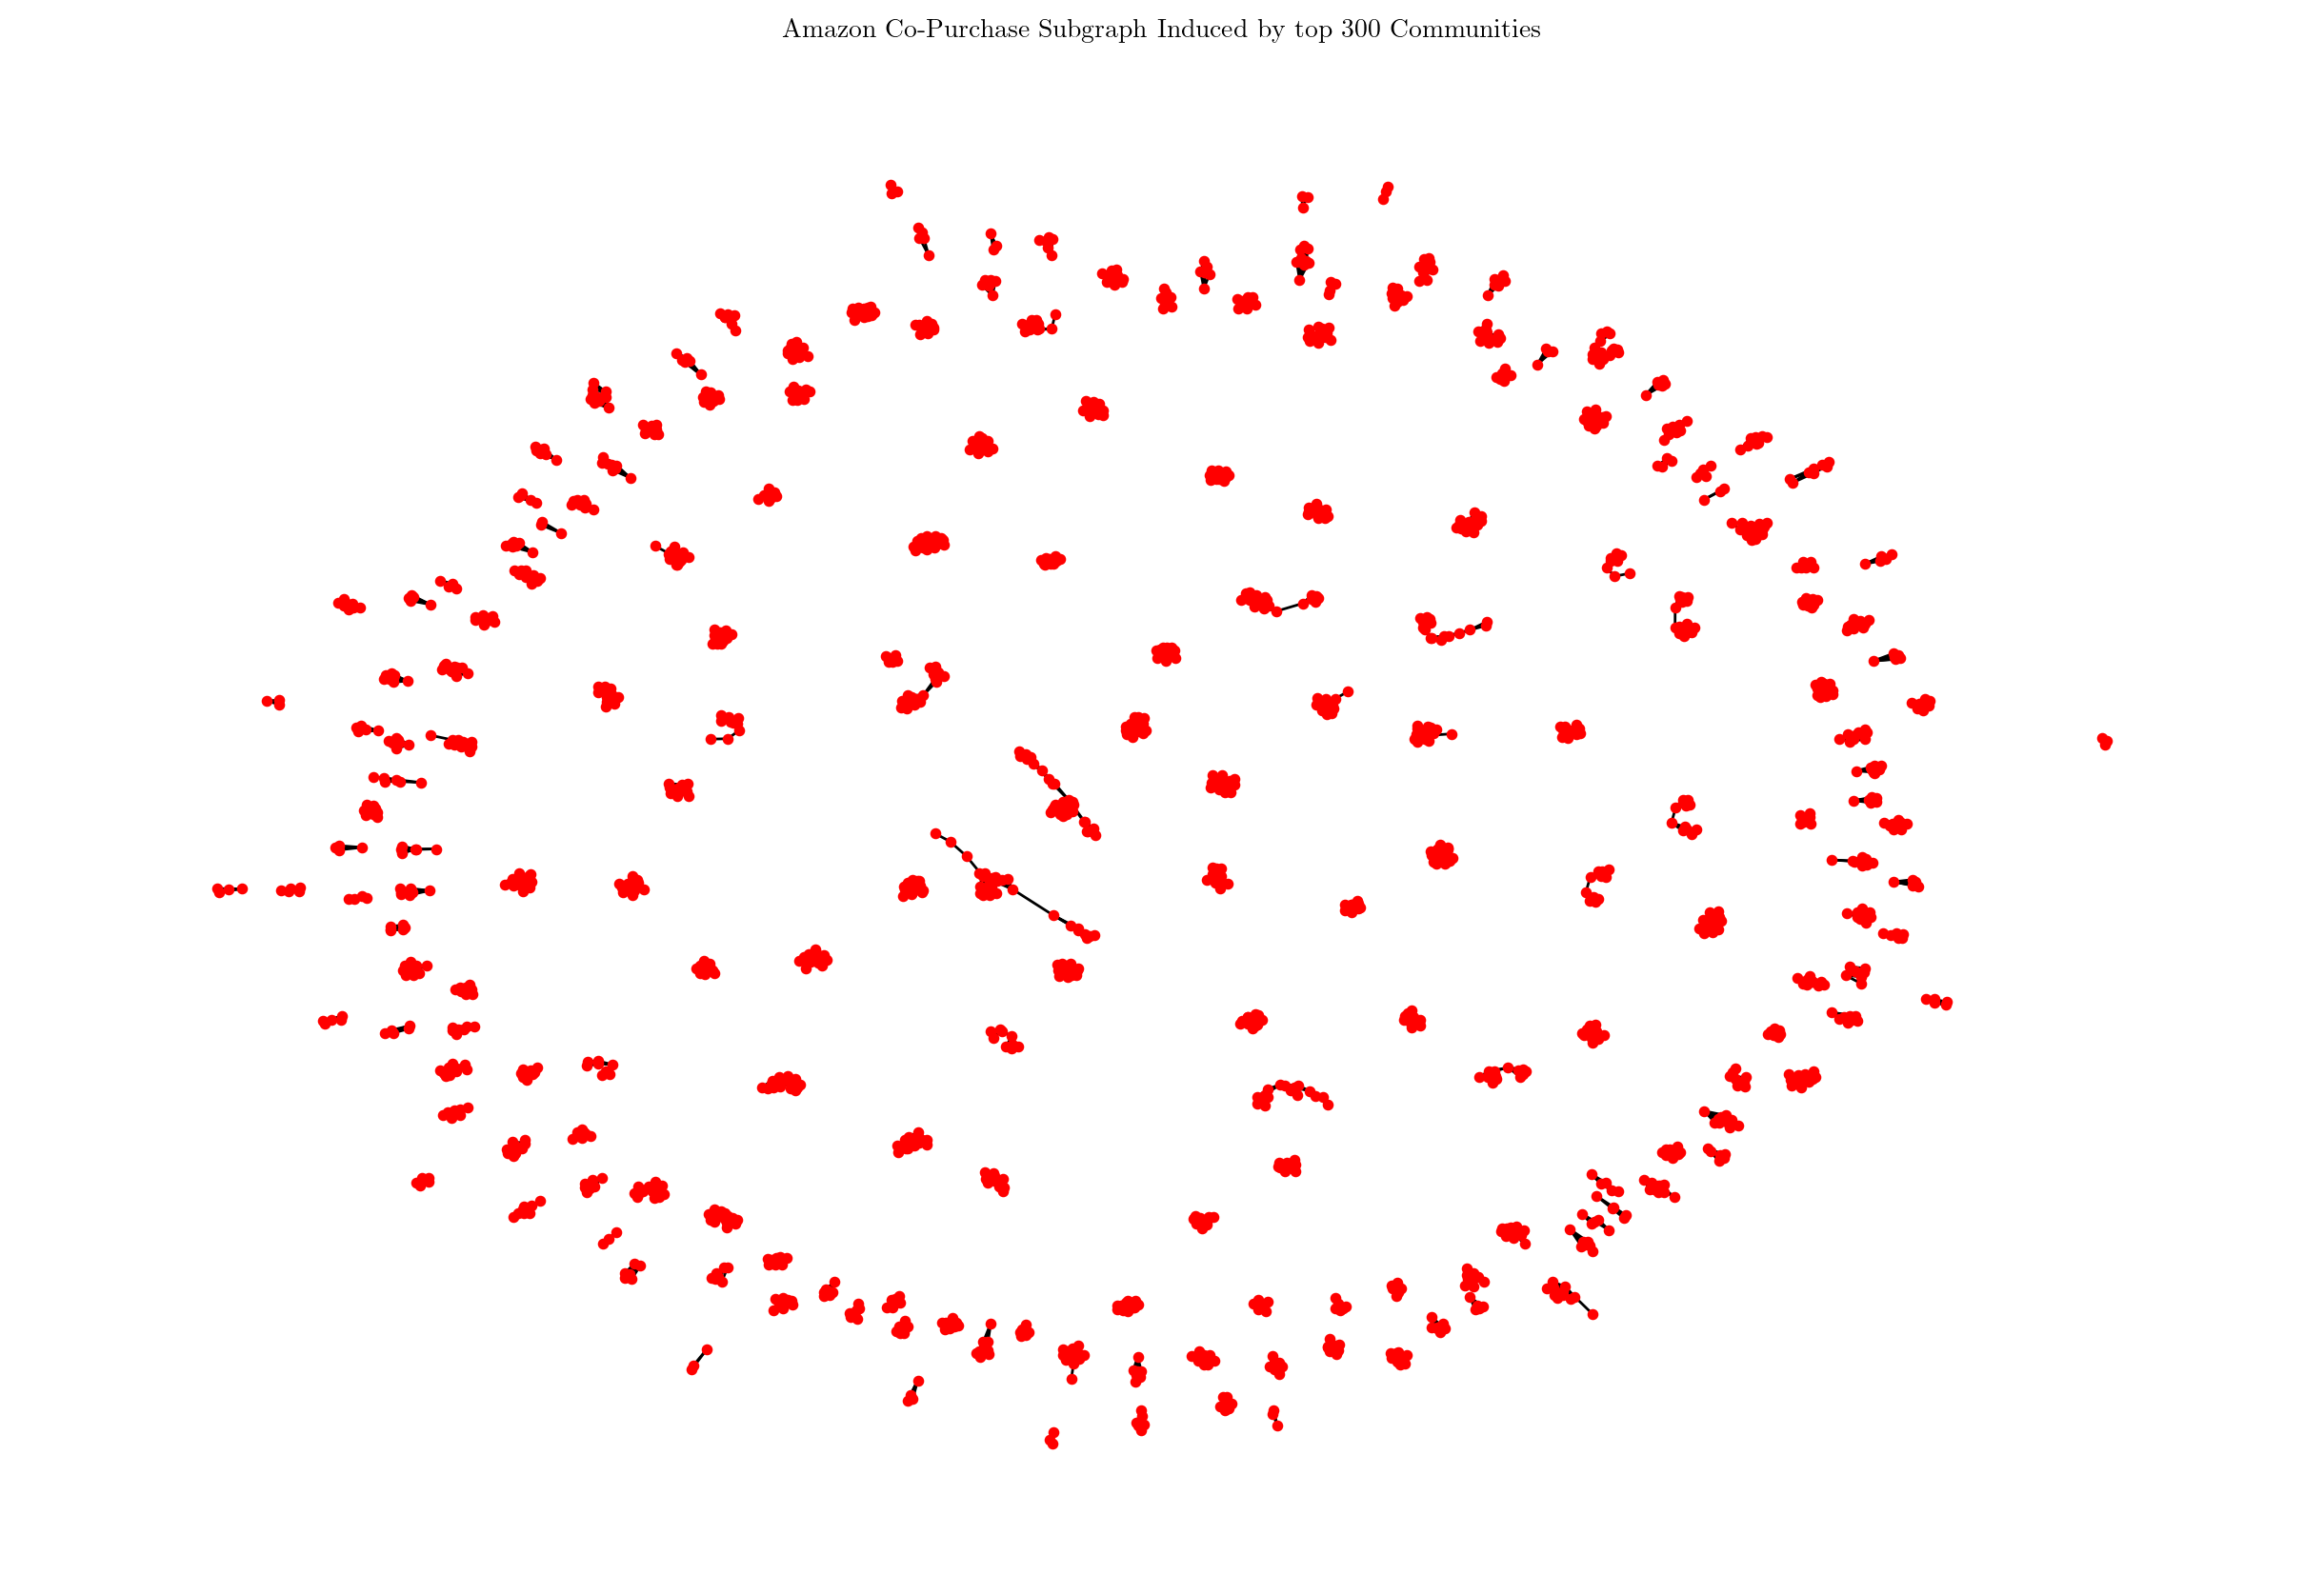

In [126]:
plt.figure(figsize = (12, 8))
nx.draw(G_ind_Amz, with_labels = False, node_size = 10, node_color = "red", edge_color = "black", pos = nx.spring_layout(G_ind_Amz, scale = 4))
plt.title("Amazon Co-Purchase Subgraph Induced by top 300 Communities")
plt.show()

# **YouTube**

In [28]:
G_YT = loadGraph("./Networks/YouTube/com-youtube.ungraph.txt")
communitiesYT, nodes = loadCommunity("./Networks/YouTube/com-youtube.top5000.cmty.txt", k = 100)
G_ind_YT = inducedSubgraph(G_YT, nodes)

print("Number of nodes: ", G_YT.number_of_nodes())
print("Number of edges: ", G_YT.number_of_edges())
print("Number of communities: ", len(communities))
print("Number of nodes in induced subgraph: ", G_ind_YT.number_of_nodes())
print("Number of edges in induced subgraph: ", G_ind_YT.number_of_edges())

Number of nodes:  1134890
Number of edges:  2987624
Number of communities:  100
Number of nodes in induced subgraph:  4890
Number of edges in induced subgraph:  20787


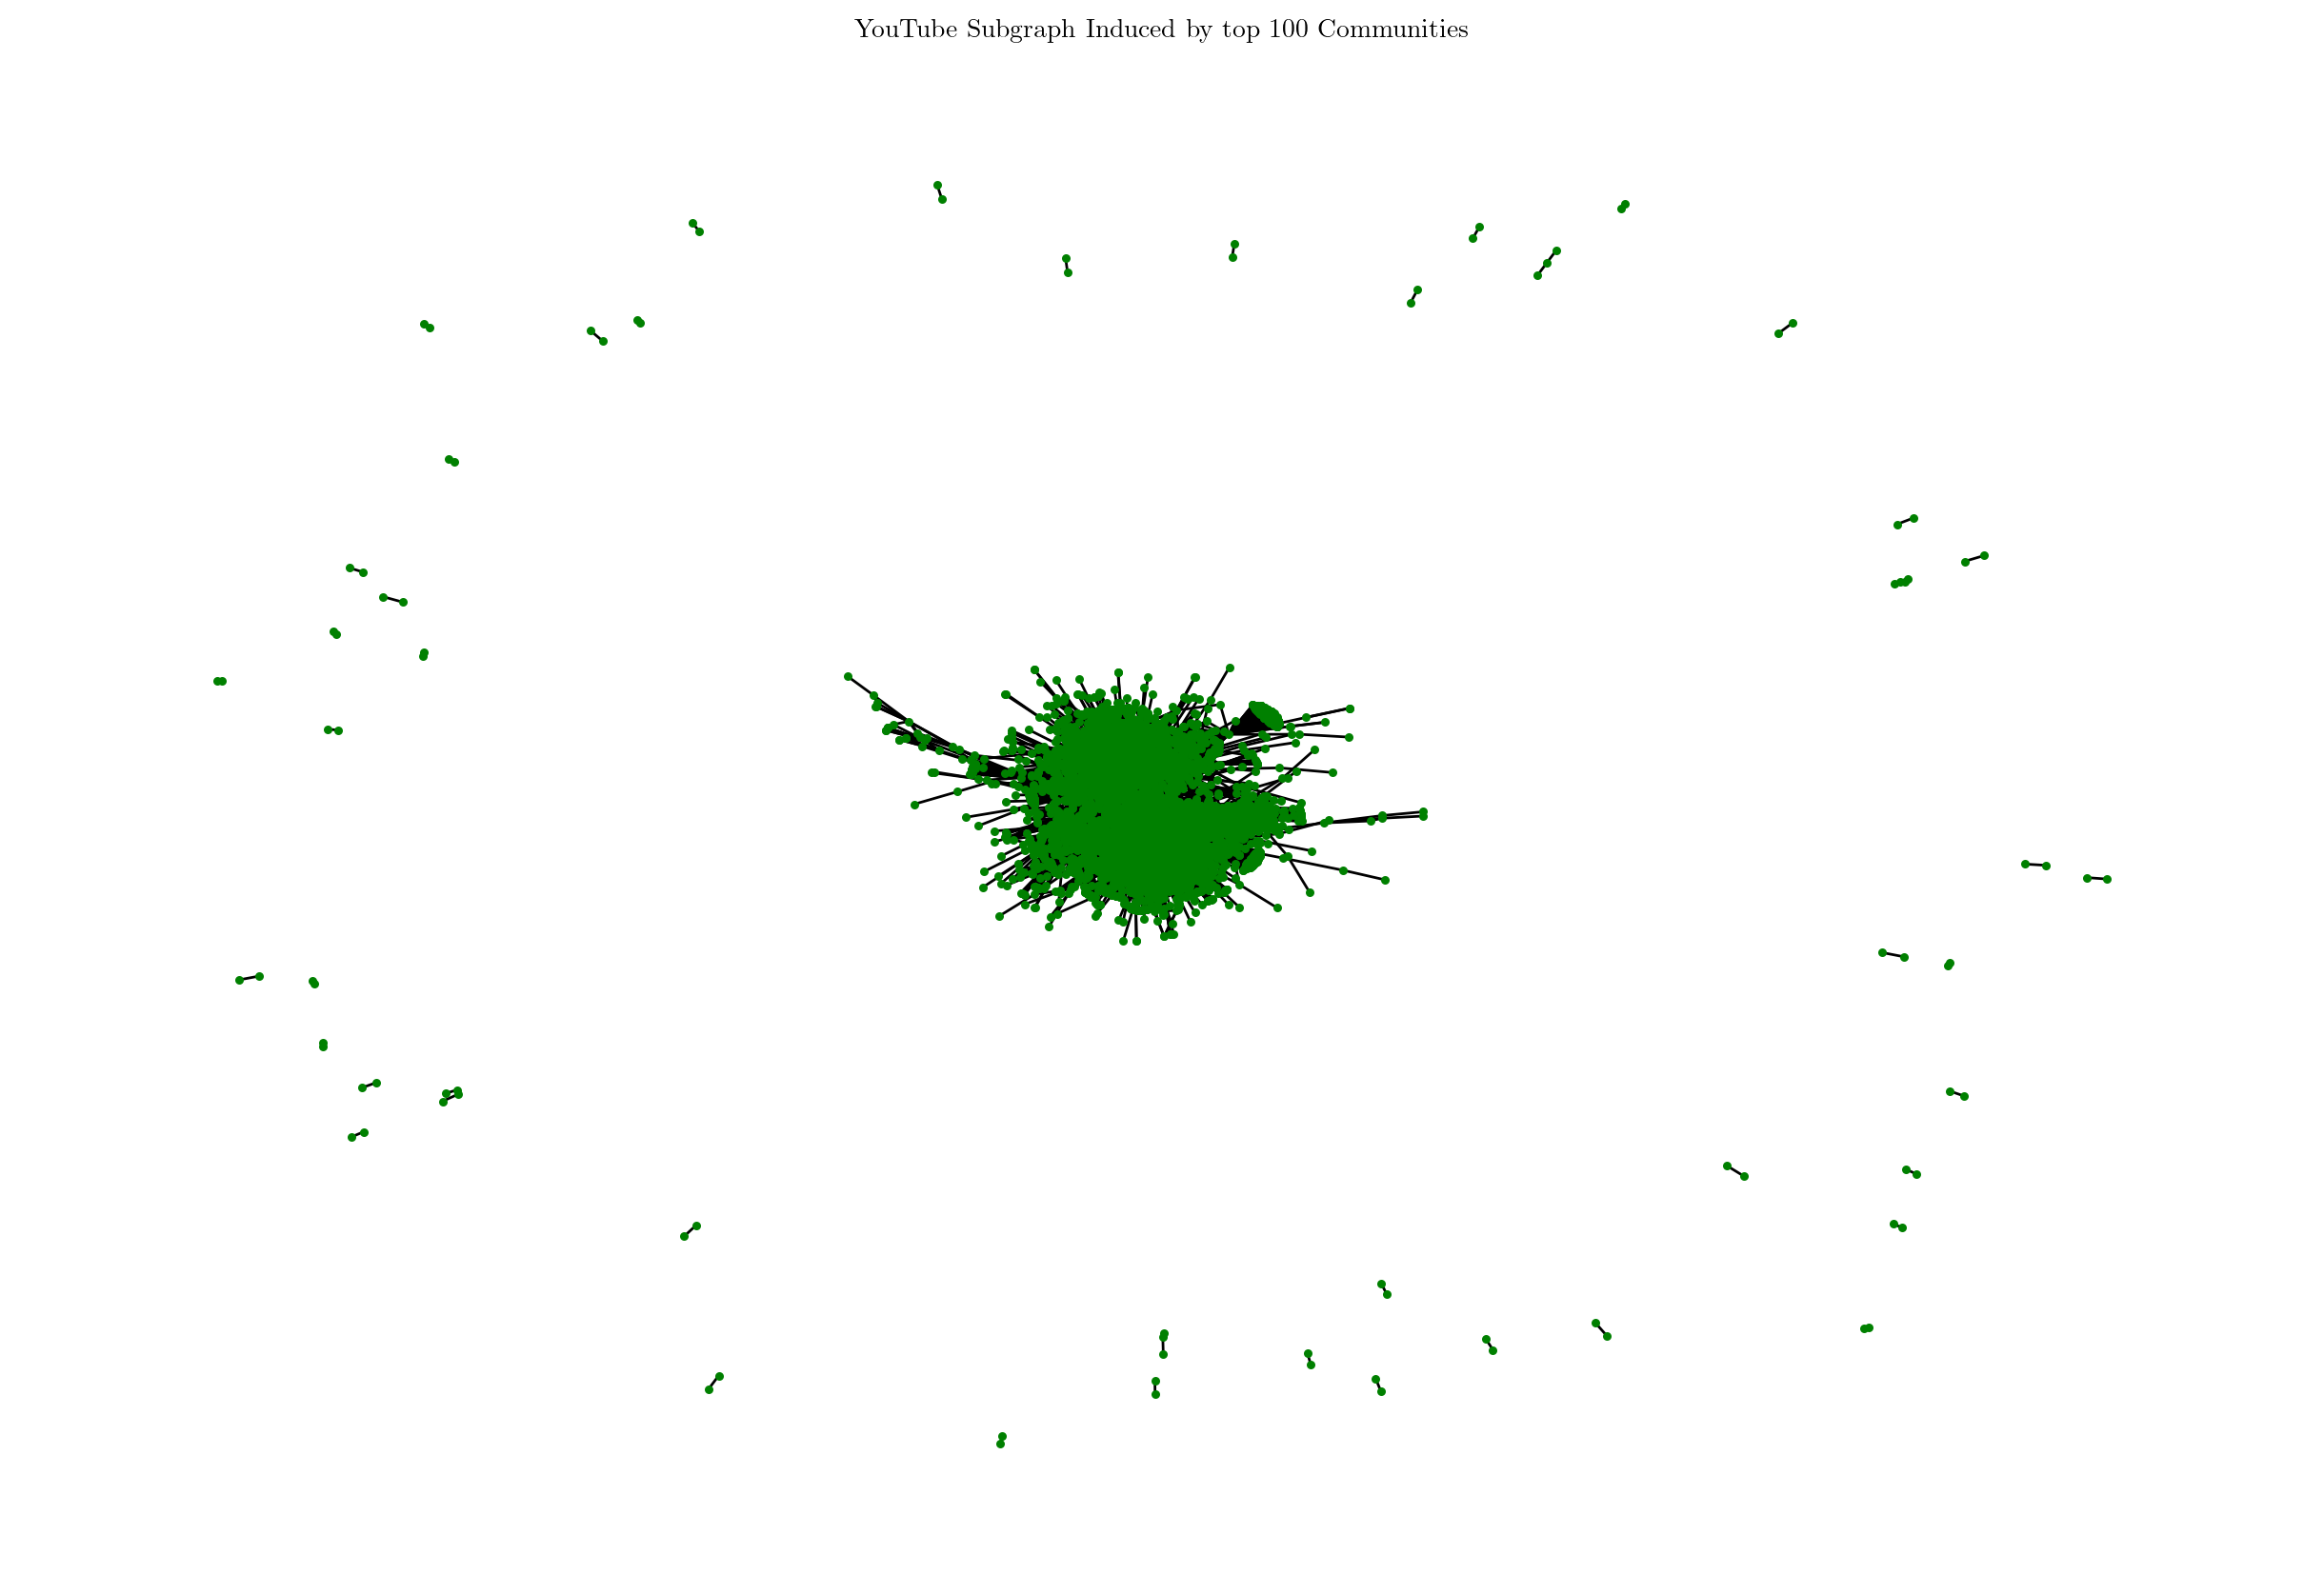

In [128]:
plt.figure(figsize = (12, 8))
nx.draw(G_ind_YT, with_labels = False, node_size = 5, node_color = "green", edge_color = "black", pos = nx.spring_layout(G_ind_YT, scale = 4))
plt.title("YouTube Subgraph Induced by top 100 Communities")
plt.show()

# **Email-Eu-Core Network**

In [13]:
from collections import defaultdict
def loadEUCommunity(path):
    community = defaultdict(list)
    with open(path) as f:
         for line in f:
            node, comm_id = map(int, line.strip().split())
            community[comm_id].append(node)
    return community

def loadEUGraph(path):
    G = nx.Graph()
    with open(path) as f:
        for line in f:
            u, v = map(int, line.strip().split())
            if (v != u):
                G.add_edge(u, v)
            else:
                G.add_node(u)
    return G

In [14]:
G_eu = loadEUGraph("./Networks/EmailEUCore/email-Eu-core.txt")
comm = loadEUCommunity("./Networks/EmailEUCore/email-Eu-core-department-labels.txt")

print("Number of nodes: ", G_eu.number_of_nodes())
print("Number of edges: ", G_eu.number_of_edges())
print("Number of communities: ", len(comm))

Number of nodes:  1005
Number of edges:  16064
Number of communities:  42


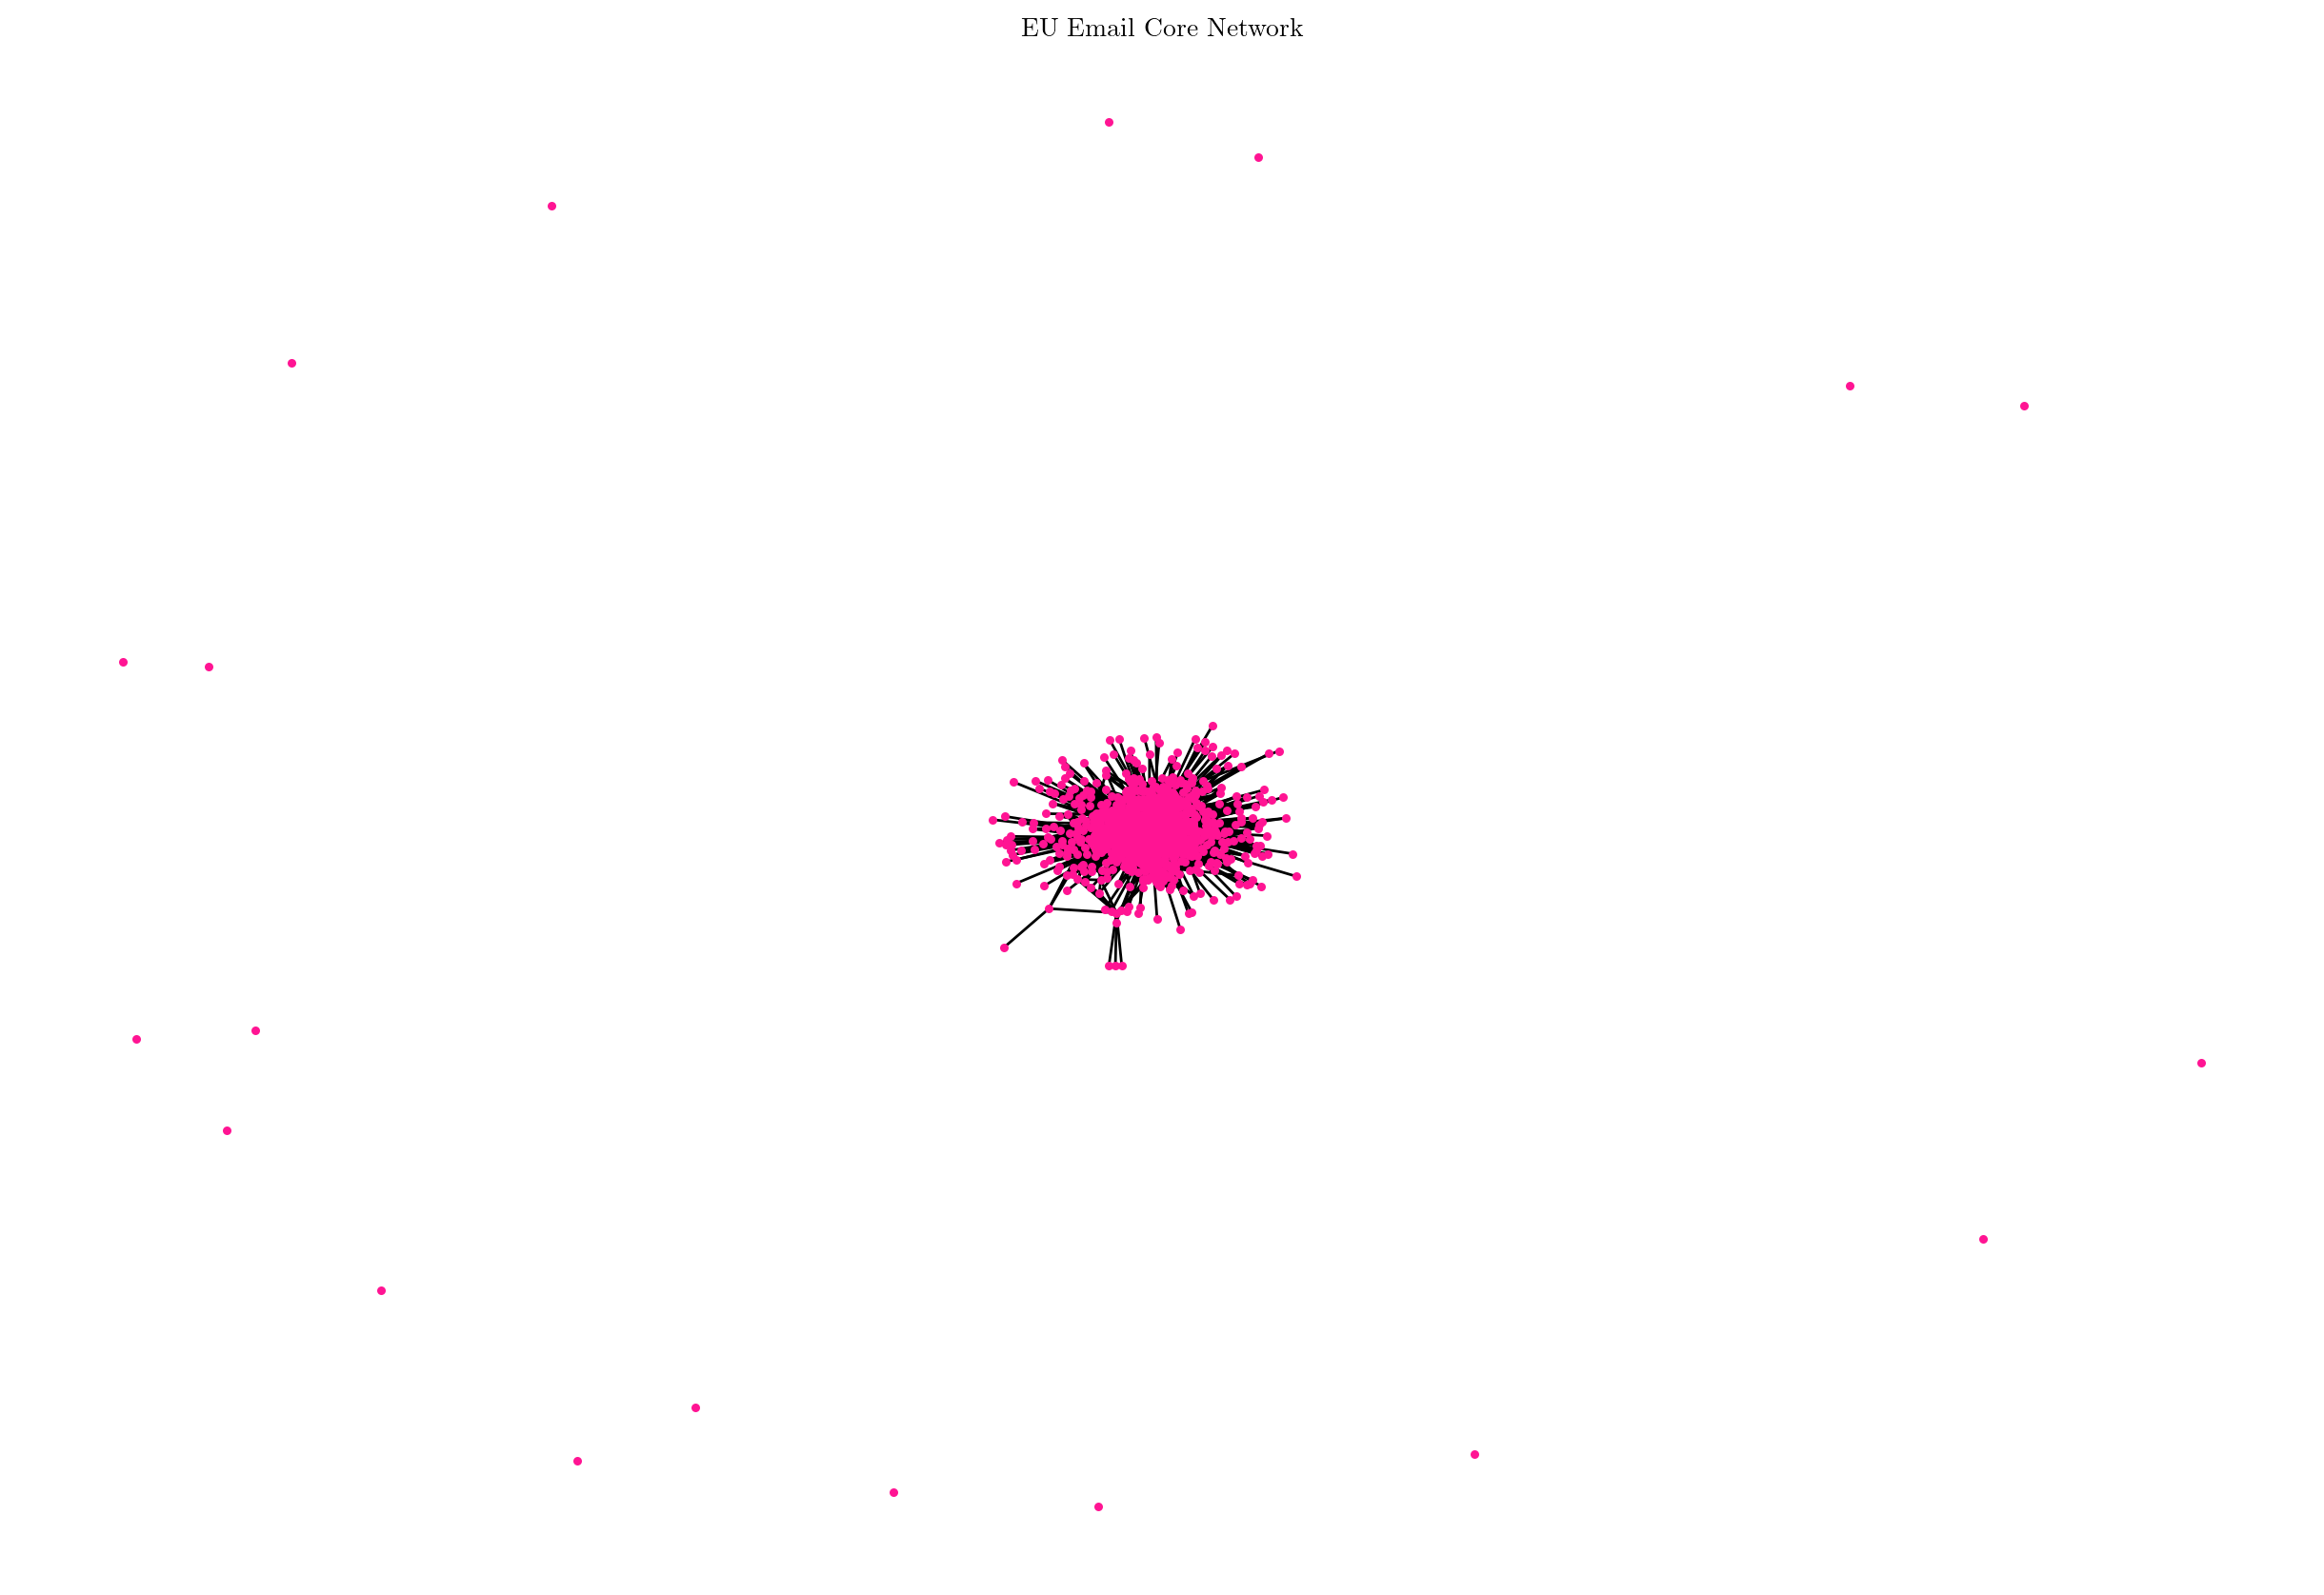

In [15]:
plt.figure(figsize = (12, 8))
nx.draw(G_eu, with_labels = False, node_size = 5, node_color = "deeppink", edge_color = "black", pos = nx.spring_layout(G_eu, scale = 4))
plt.title("EU Email Core Network")
plt.show()

# **Facebook**

In [16]:
G_FB = loadEUGraph("./Networks/FacebookCircles/facebook_combined.txt")

print("Number of nodes: ", G_FB.number_of_nodes())
print("Number of edges: ", G_FB.number_of_edges())

Number of nodes:  4039
Number of edges:  88234


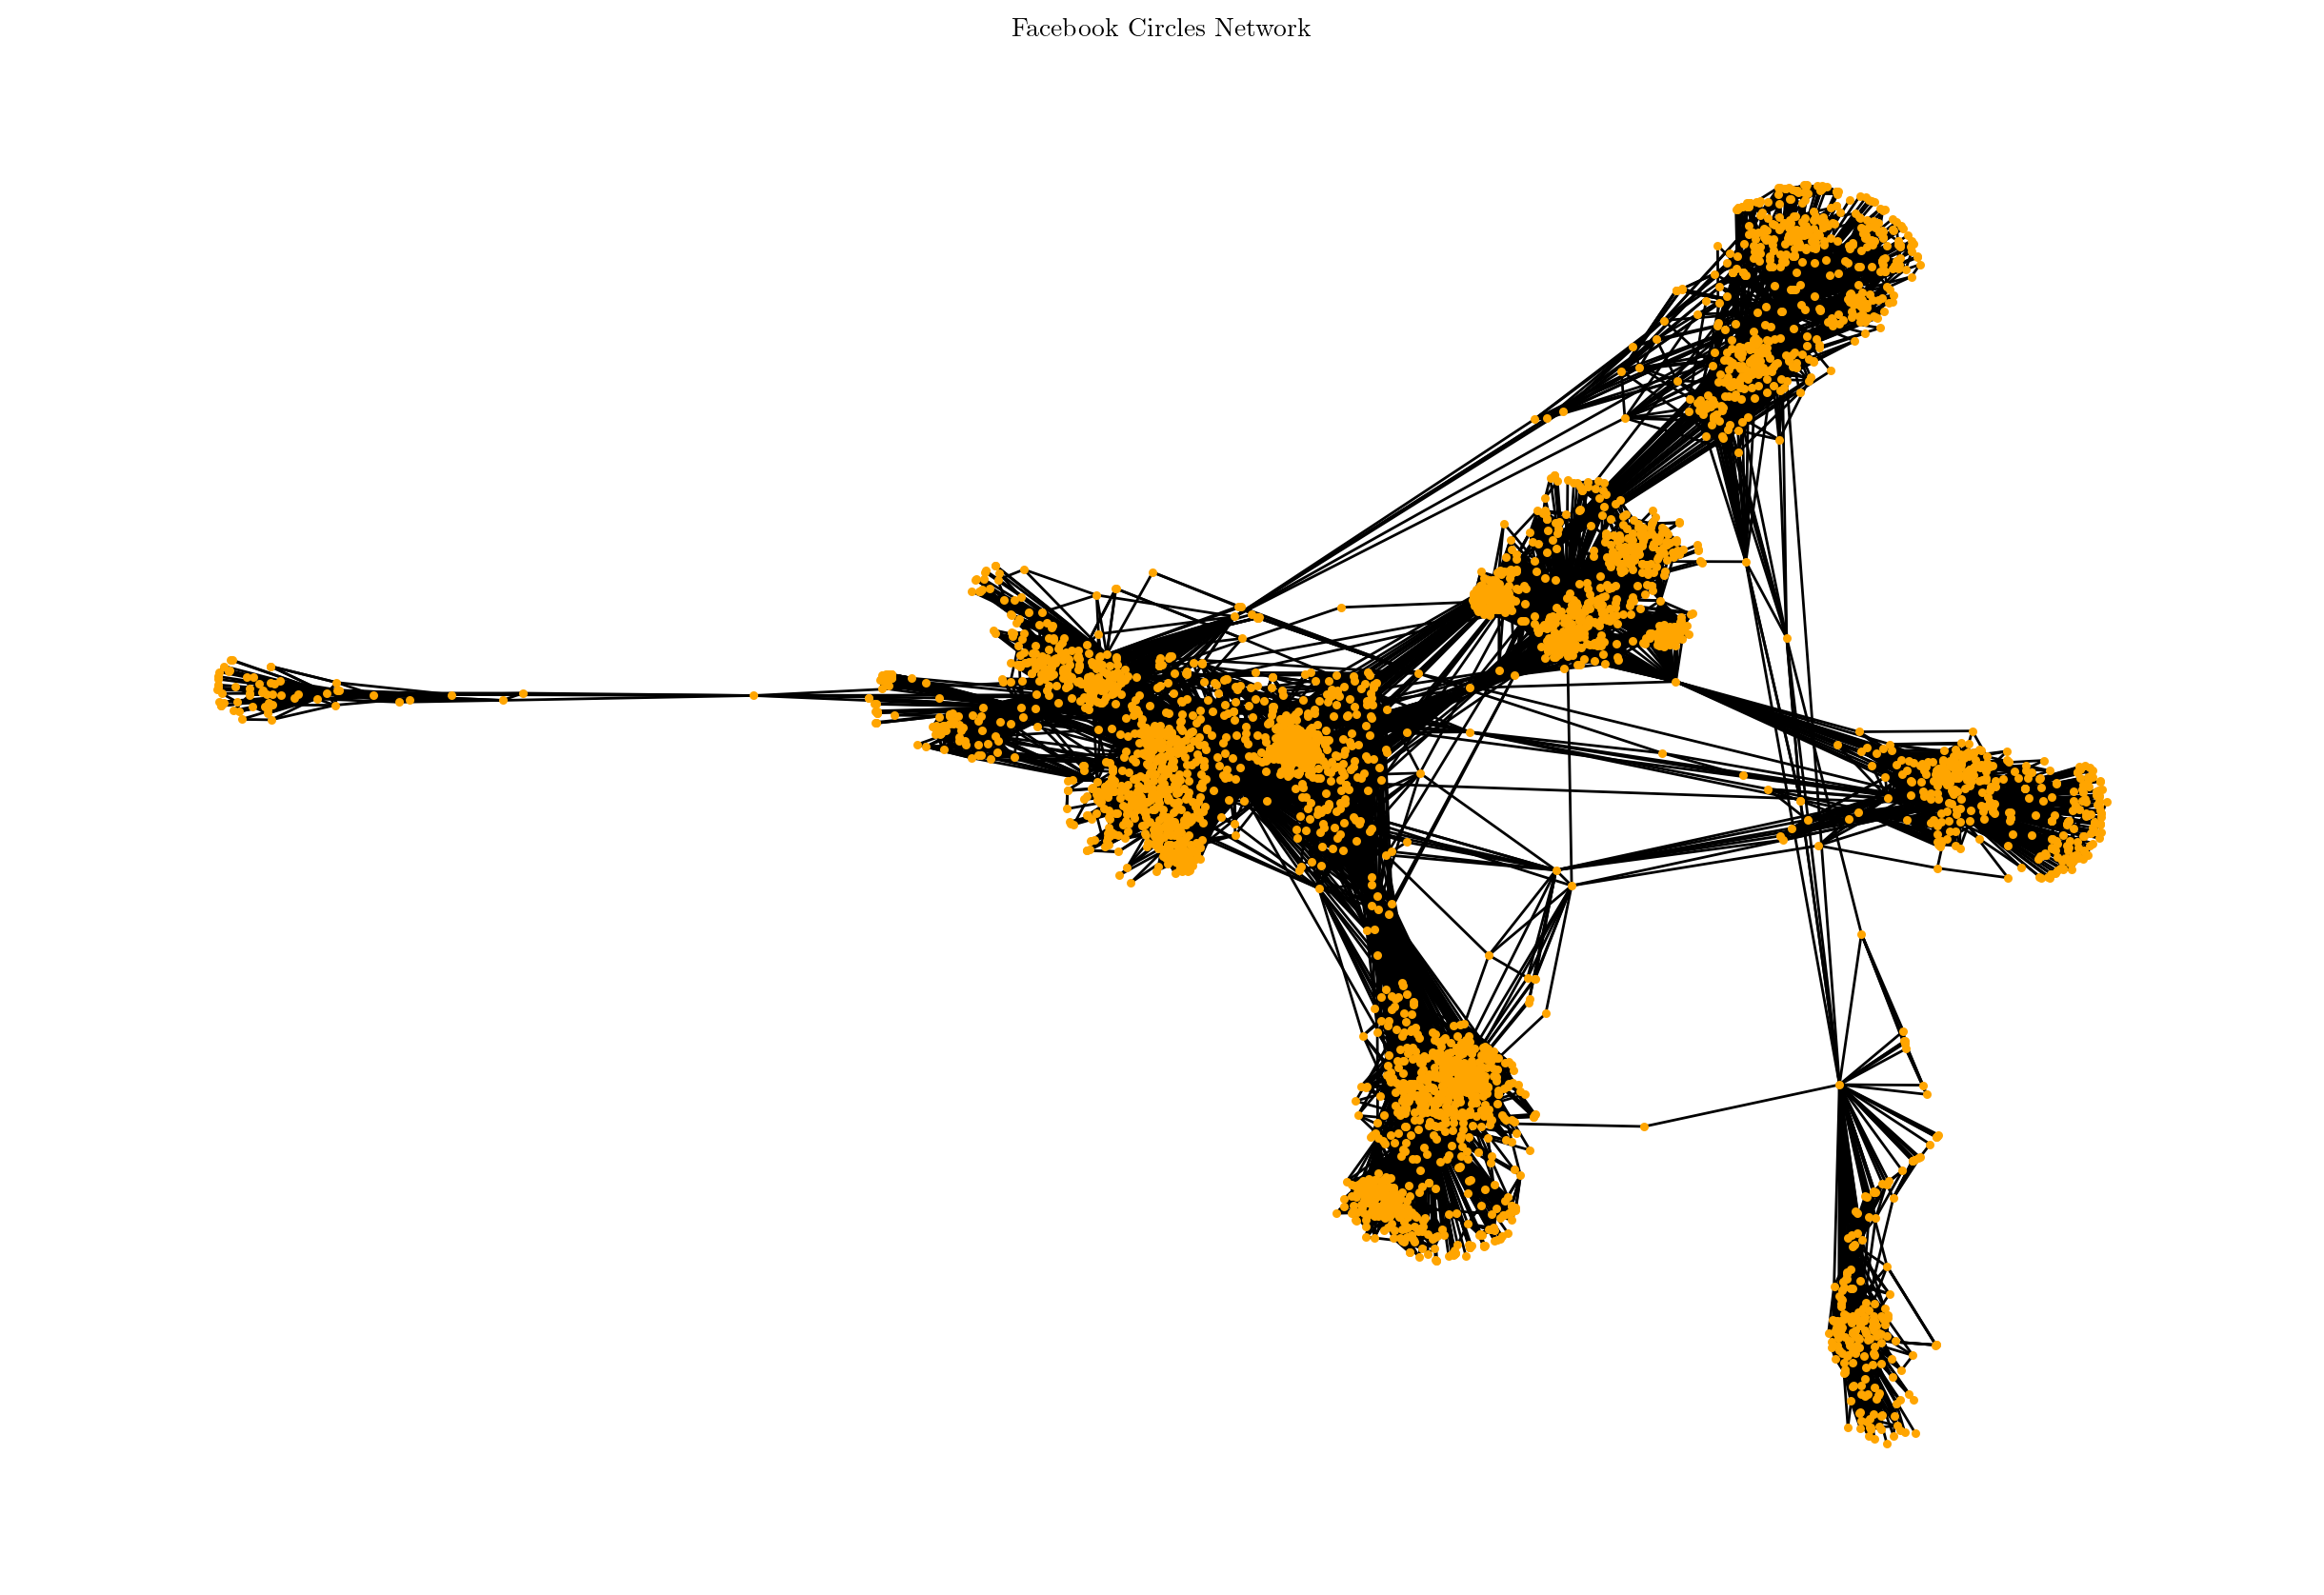

In [17]:
plt.figure(figsize = (12, 8))
nx.draw(G_FB, with_labels = False, node_size = 5, node_color = "orange", edge_color = "black", pos = nx.spring_layout(G_FB, scale = 4))
plt.title("Facebook Circles Network")
plt.show()

In [24]:
def plotRandomCommunity(G, community, title = None):
    id = np.random.randint(len(community))
    H = G.subgraph(community[id])
    plt.figure(figsize = (12, 8))
    nx.draw(H, with_labels = False, node_size = 50, node_color = "darkblue", edge_color = "black", pos = nx.spring_layout(H, scale = 4))
    plt.title(f"Community {id + 1} {title}")
    plt.show()

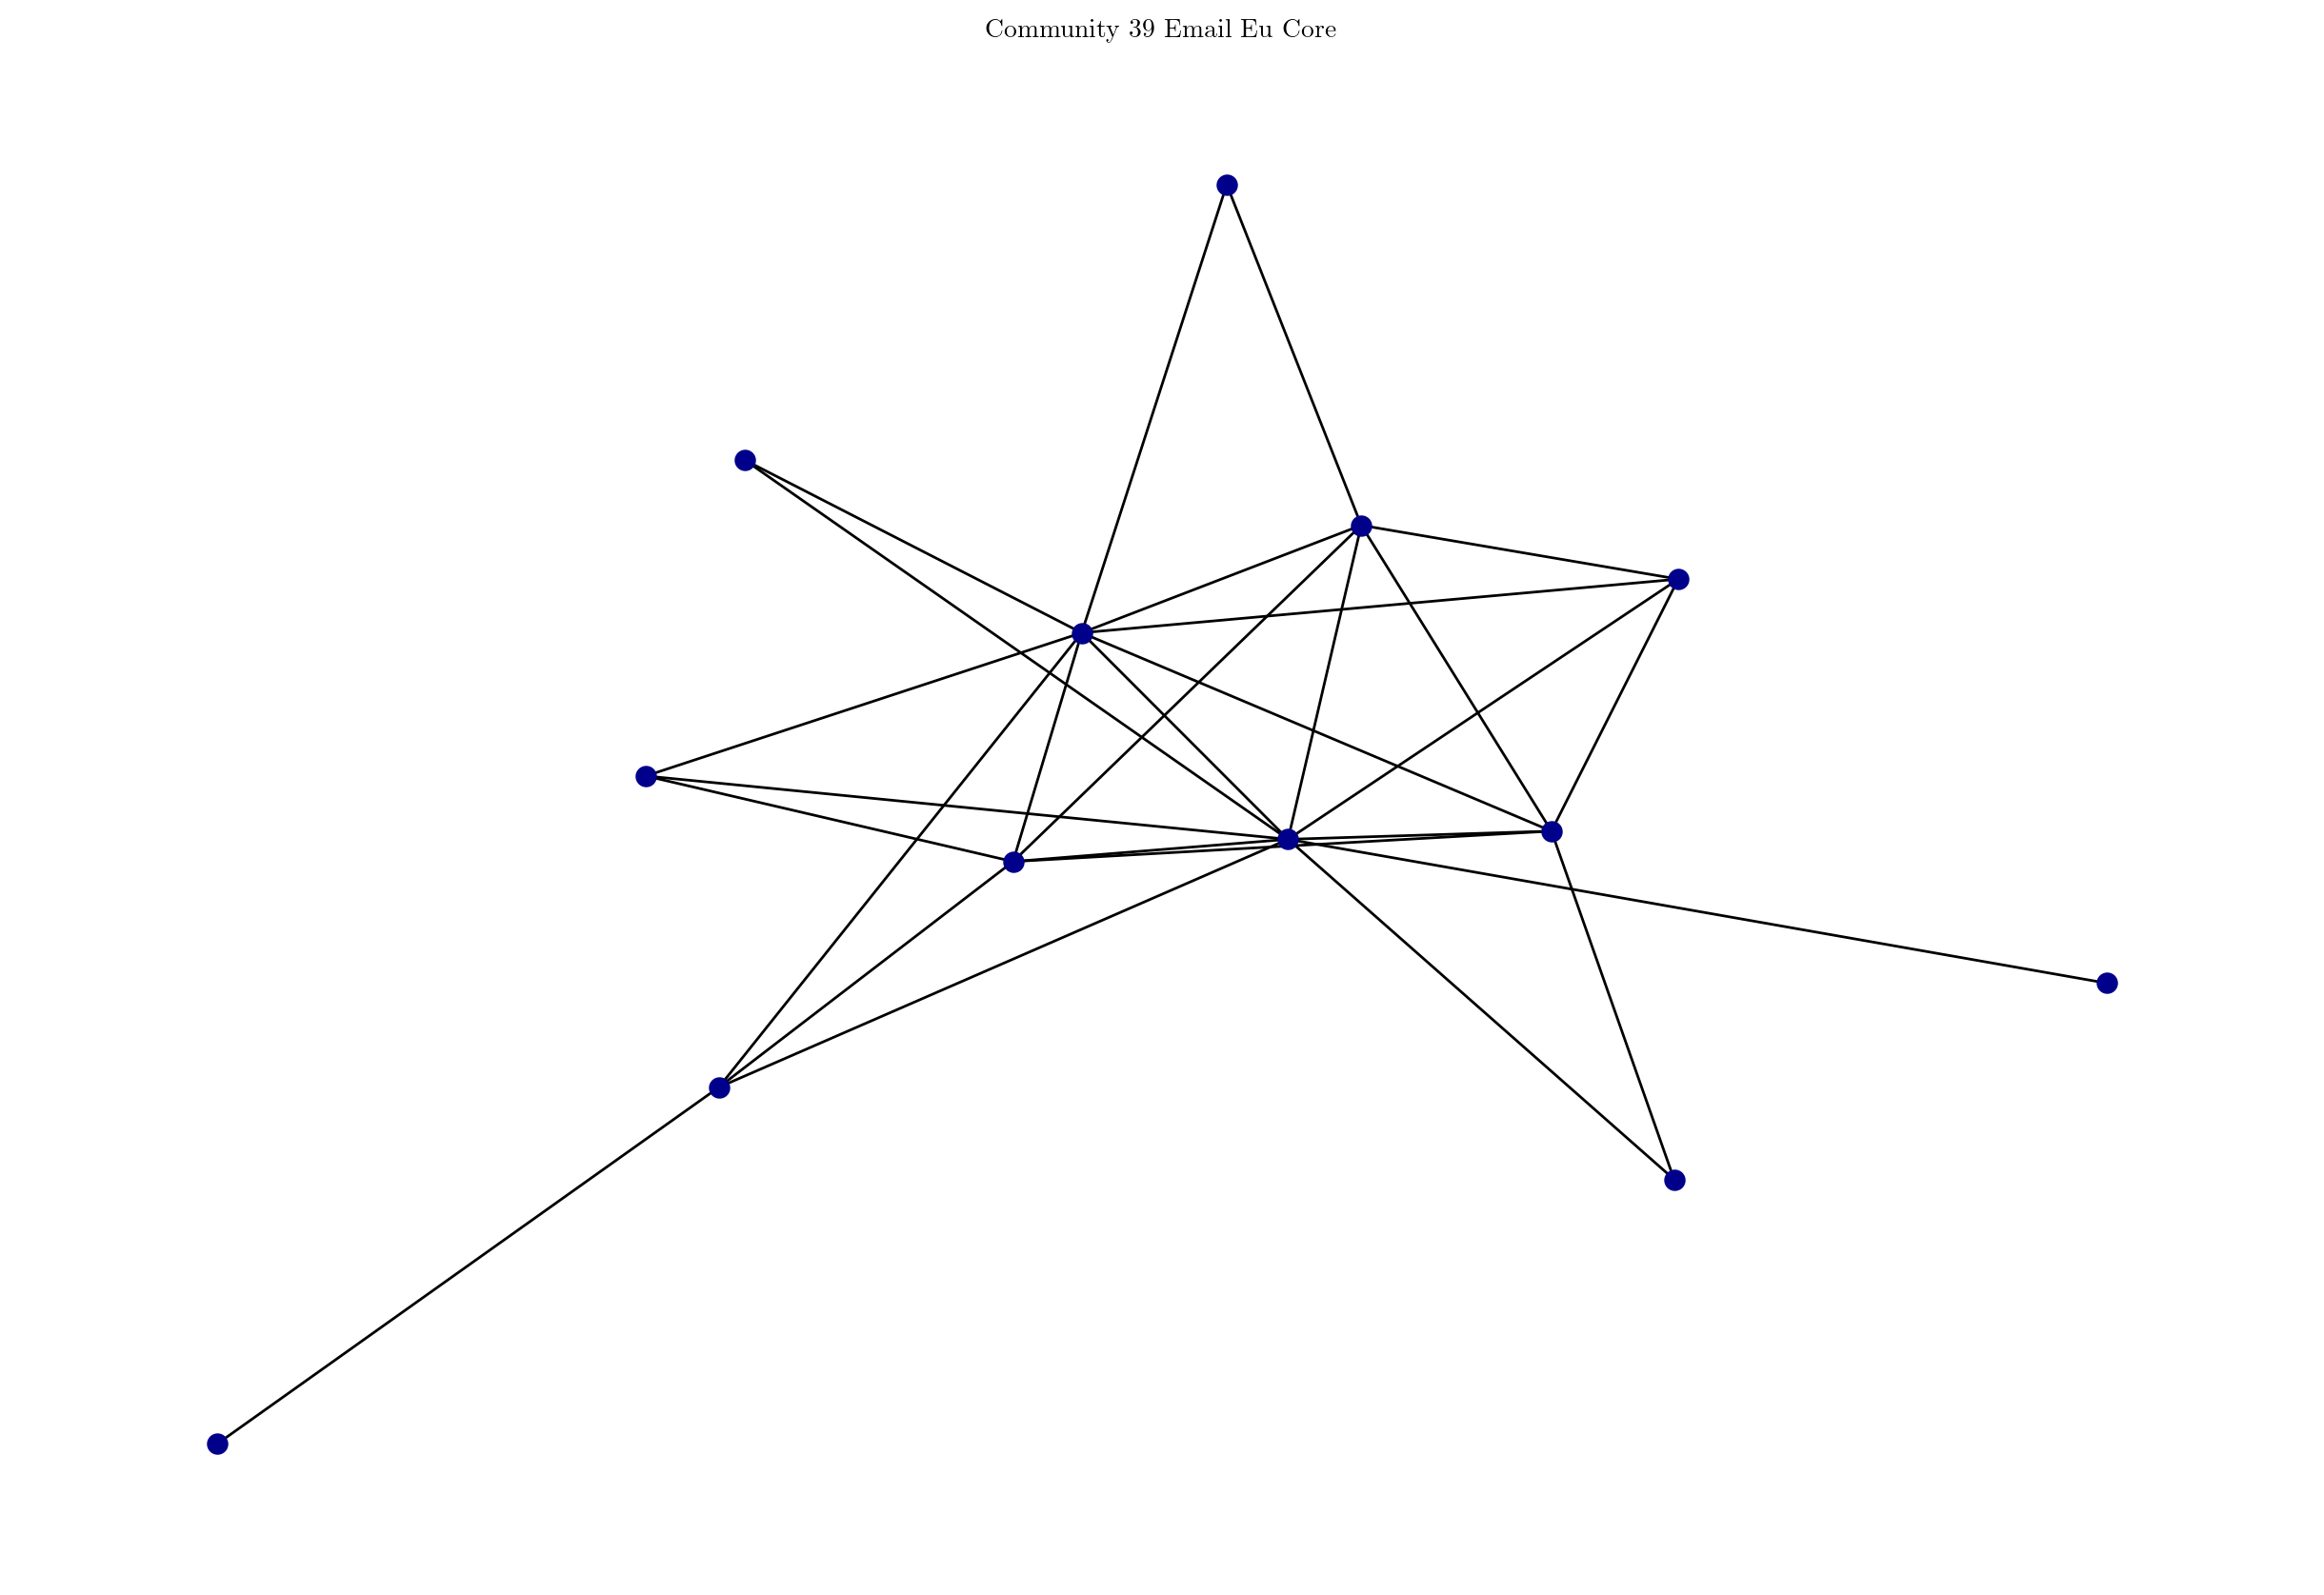

In [26]:
plotRandomCommunity(G_eu, comm, "Email Eu Core")

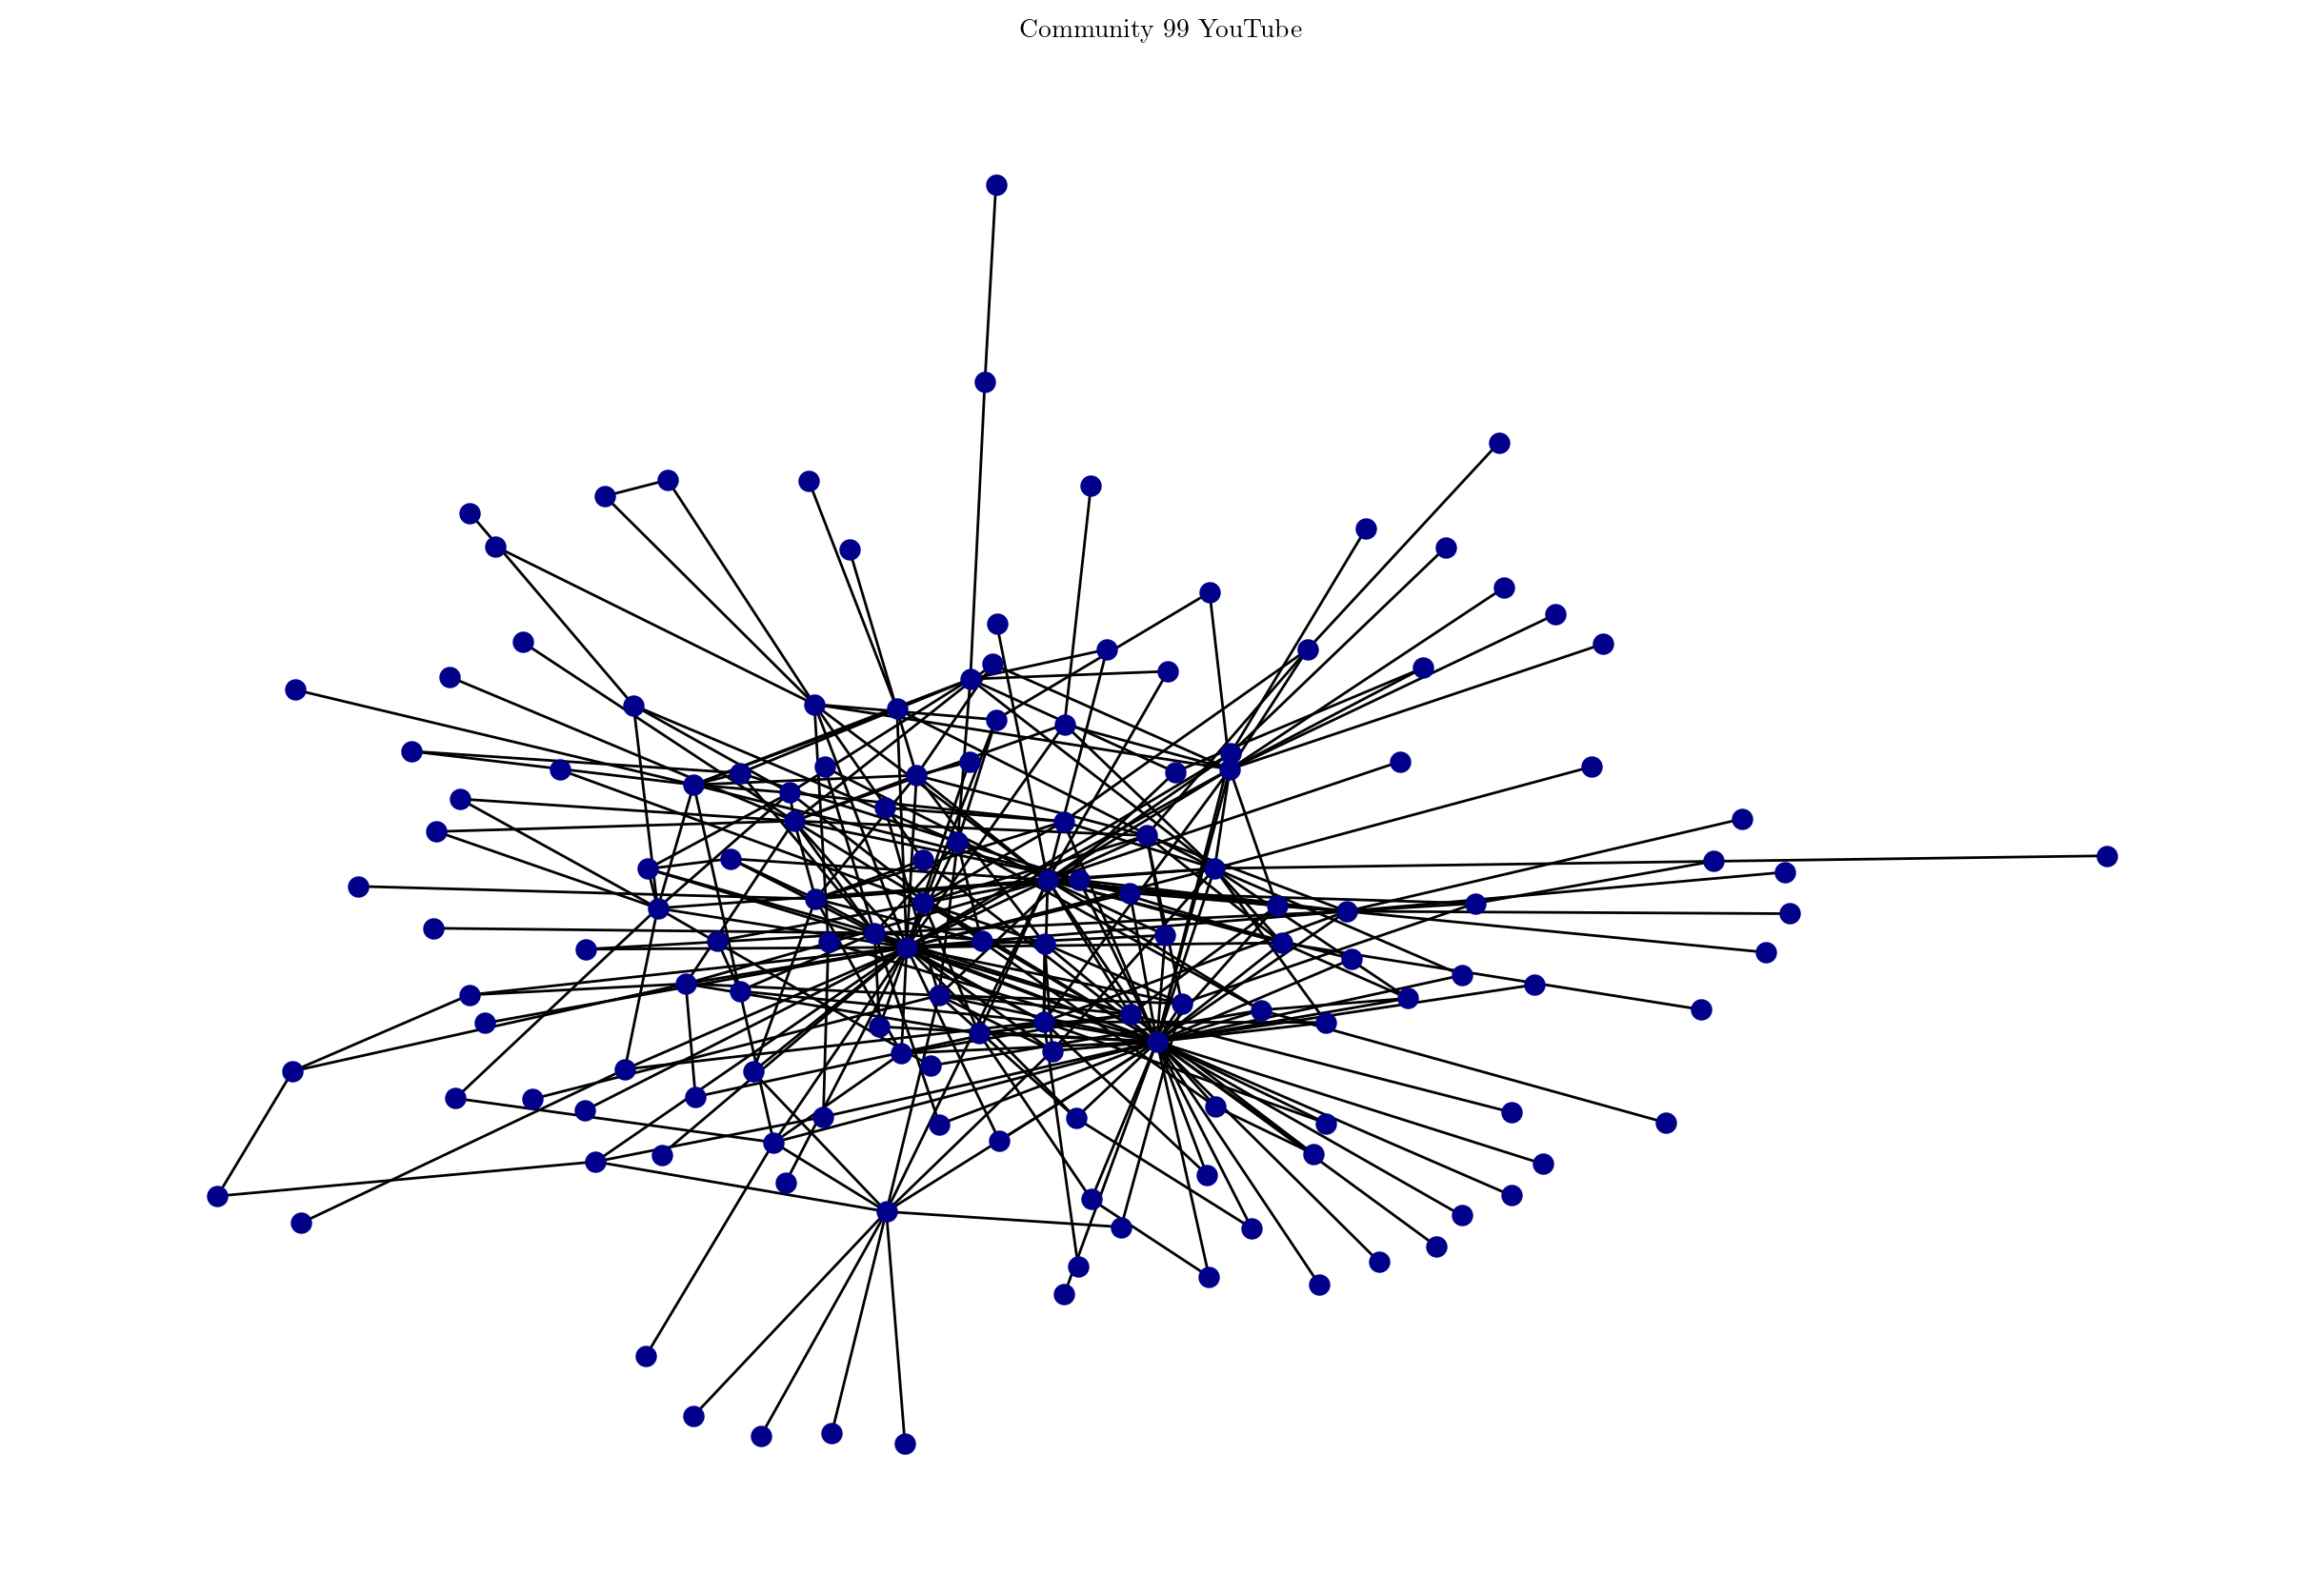

In [27]:
plotRandomCommunity(G_ind_YT, communities, title = "YouTube")

In [36]:
from sklearn.metrics import adjusted_rand_score, normalized_mutual_info_score

def get_adjusted_ground_truth(ground_truth_communities):
    adjusted_ground_truth = {}
    for community_id, nodes in ground_truth_communities.items():
        for node in nodes:
            adjusted_ground_truth[node] = community_id
    return adjusted_ground_truth

def compare_communities(ground_truth, predicted):
    ari = adjusted_rand_score(list(ground_truth.values()), list(predicted.values()))
    nmi = normalized_mutual_info_score(list(ground_truth.values()), list(predicted.values()))
    return ari, nmi


adjusted_YT_comm = get_adjusted_ground_truth(communitiesYT)
ari, nmi = compare_communities(adjusted_YT_comm, community.best_partition(G_ind_YT))

print("ARI: ", ari)
print("NMI: ", nmi)


ARI:  0.015958041282901455
NMI:  0.08735513151736929


In [35]:
louvain_communities = community.best_partition(G_ind_YT)
print(louvain_communities)
print(len(set(louvain_communities.values())))
print(len(set(adjusted_YT_comm.values())))
print(adjusted_YT_comm)

{1: 0, 2: 0, 3: 0, 8193: 0, 5: 14, 16385: 0, 8196: 0, 40969: 47, 49162: 0, 11: 0, 131082: 0, 13: 0, 237577: 47, 15: 0, 262162: 3, 237587: 4, 180244: 47, 49177: 4, 8218: 0, 81945: 5, 28: 47, 33: 6, 34: 5, 155686: 47, 40: 0, 311337: 7, 327720: 8, 167715: 4, 49: 47, 167717: 4, 16439: 0, 204855: 47, 106552: 6, 385083: 3, 385084: 3, 68: 0, 254023: 47, 72: 0, 483401: 4, 385099: 3, 8269: 0, 78: 0, 385103: 3, 180304: 9, 114766: 6, 385106: 3, 385107: 3, 385110: 3, 16472: 0, 122968: 0, 57432: 47, 16475: 0, 655451: 0, 90204: 0, 385113: 3, 385122: 3, 147556: 5, 32869: 4, 319590: 3, 155760: 5, 385136: 3, 385137: 3, 237684: 47, 163957: 10, 385141: 3, 204919: 11, 385143: 3, 24697: 4, 121: 0, 49281: 0, 237698: 4, 385154: 3, 385155: 3, 24709: 0, 221318: 0, 254086: 4, 237703: 4, 167733: 4, 229515: 0, 140: 0, 655500: 0, 32912: 47, 106641: 6, 385170: 3, 237715: 4, 106642: 6, 167736: 4, 237720: 4, 237721: 4, 154: 47, 157: 47, 180385: 4, 165: 0, 106661: 4, 180394: 47, 24747: 0, 8363: 0, 8365: 0, 174: 0, 172